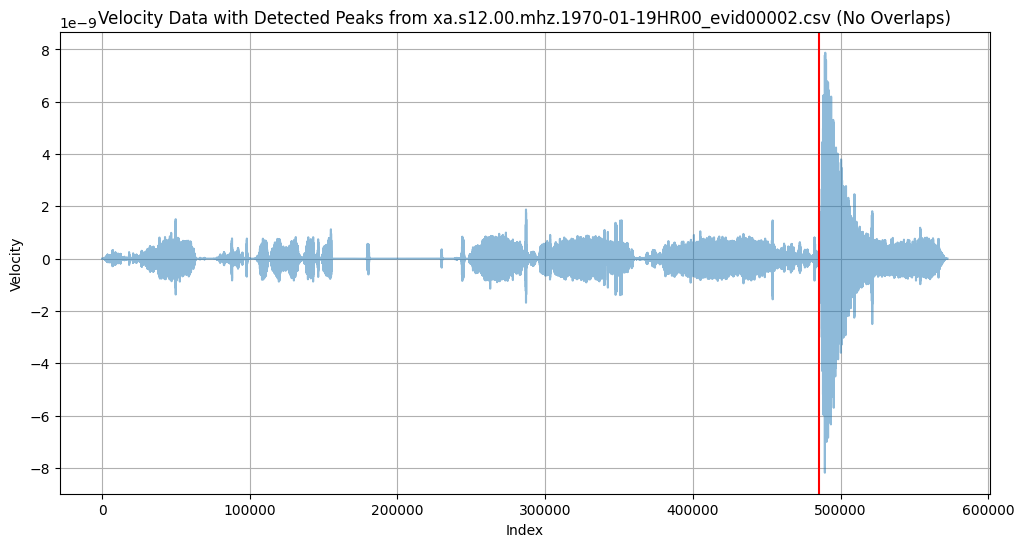

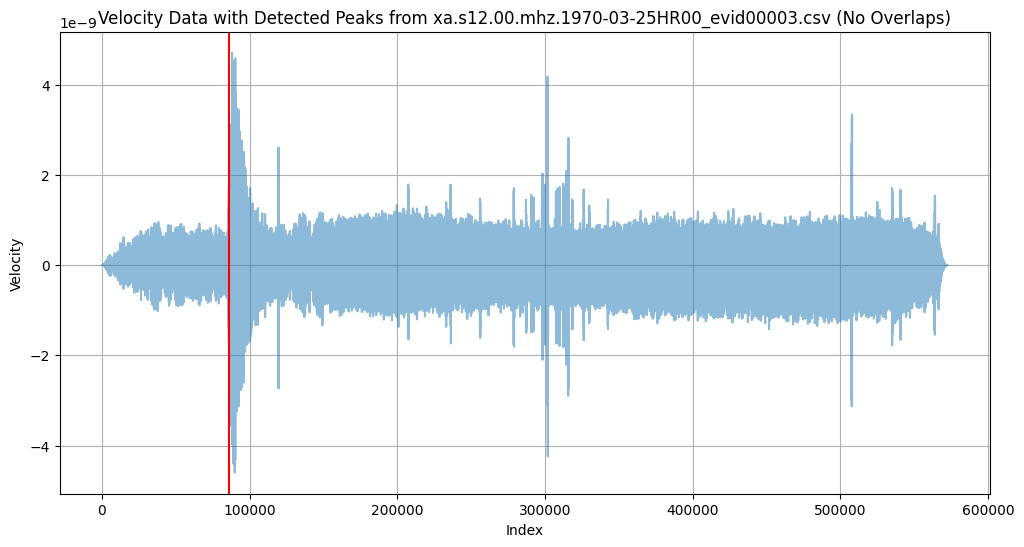

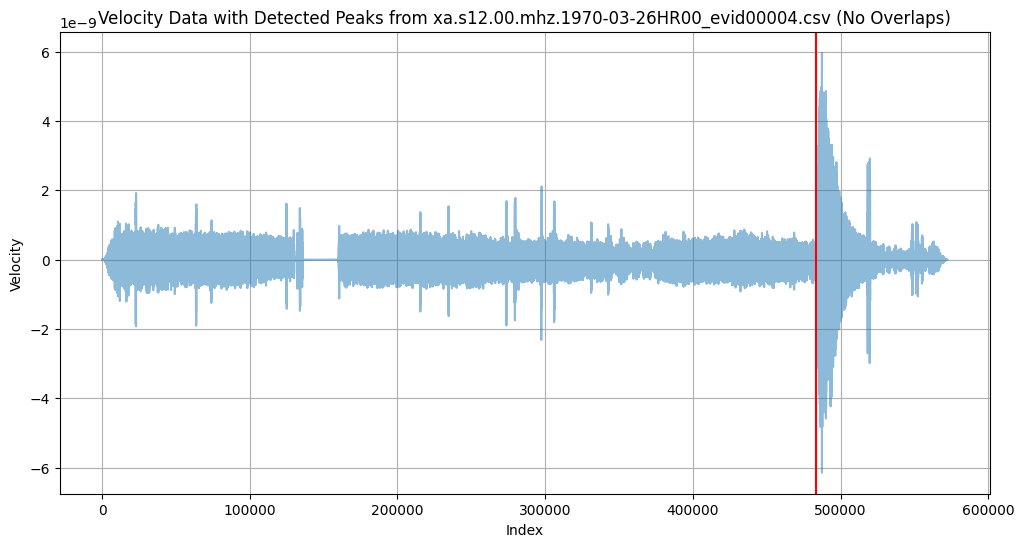

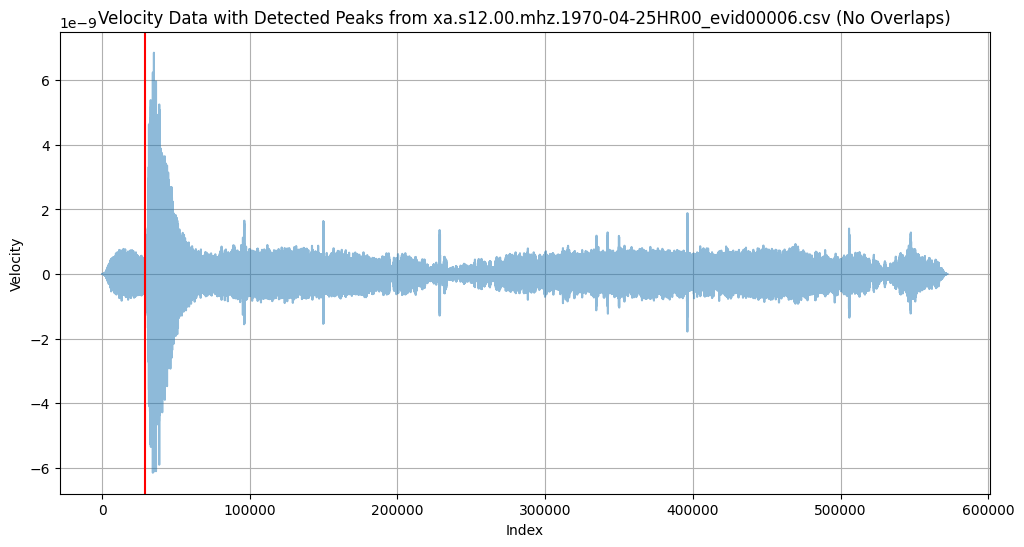

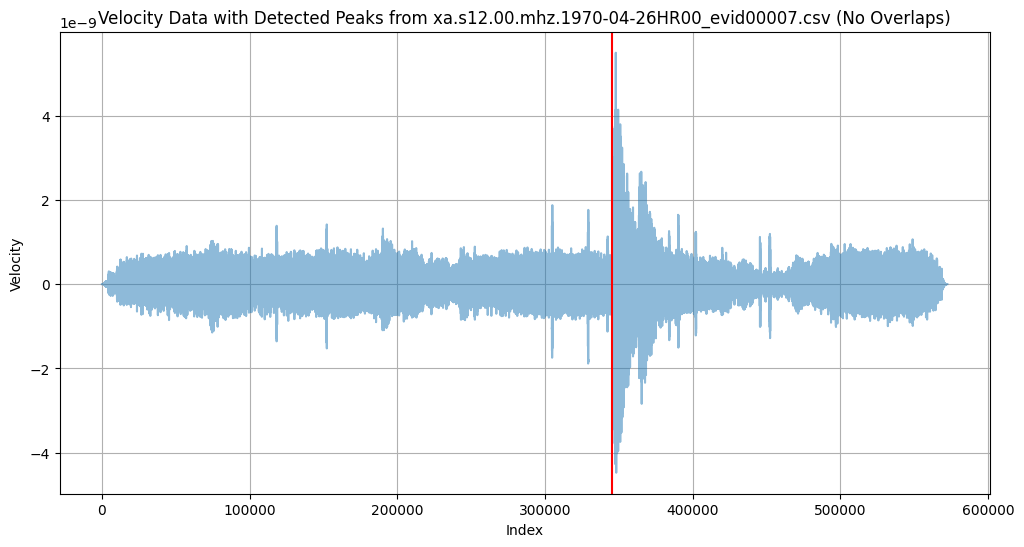

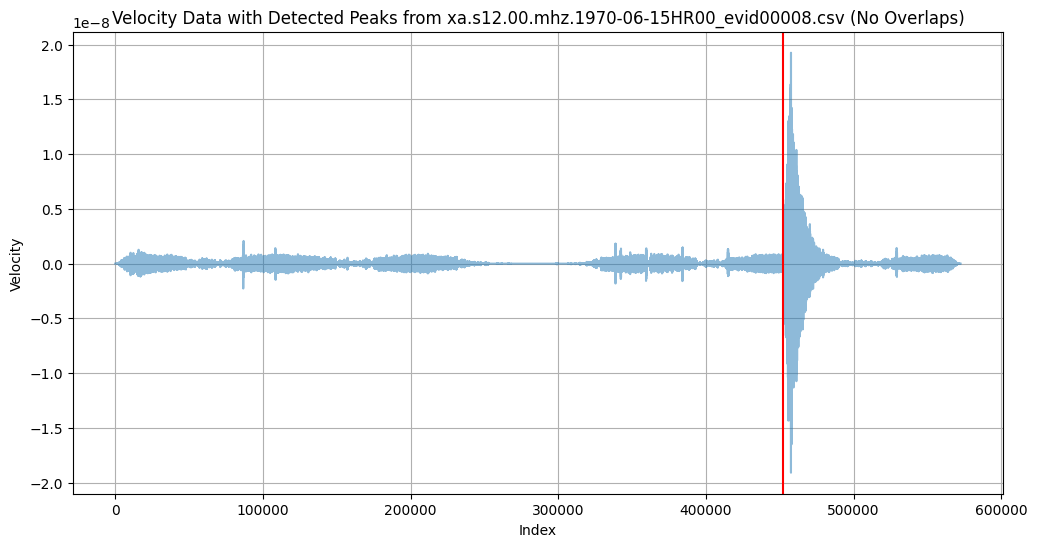

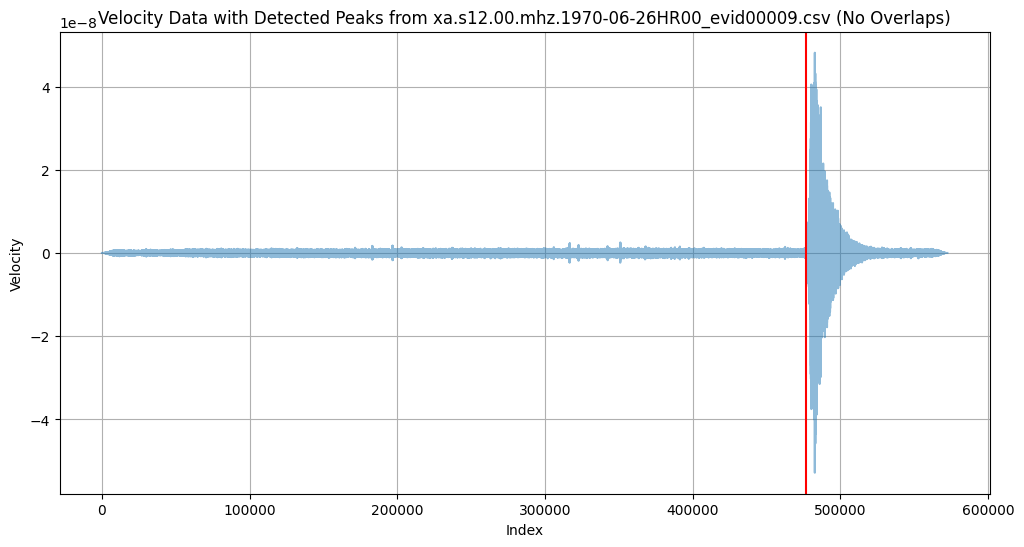

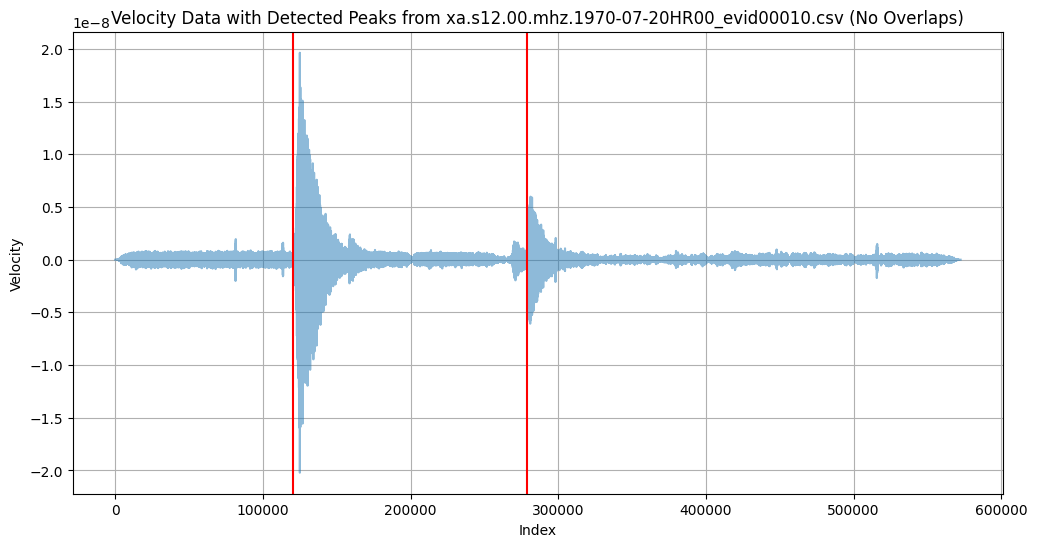

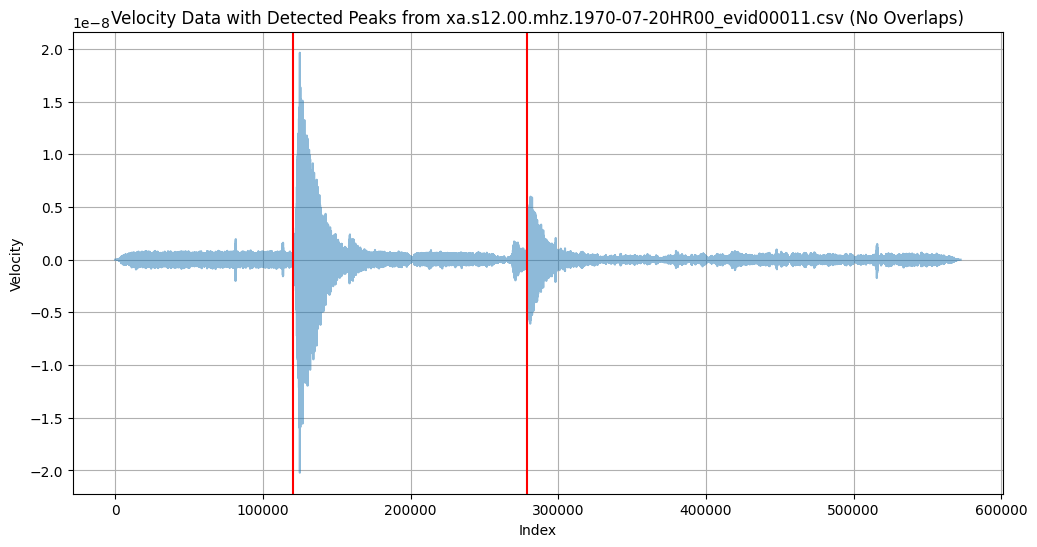

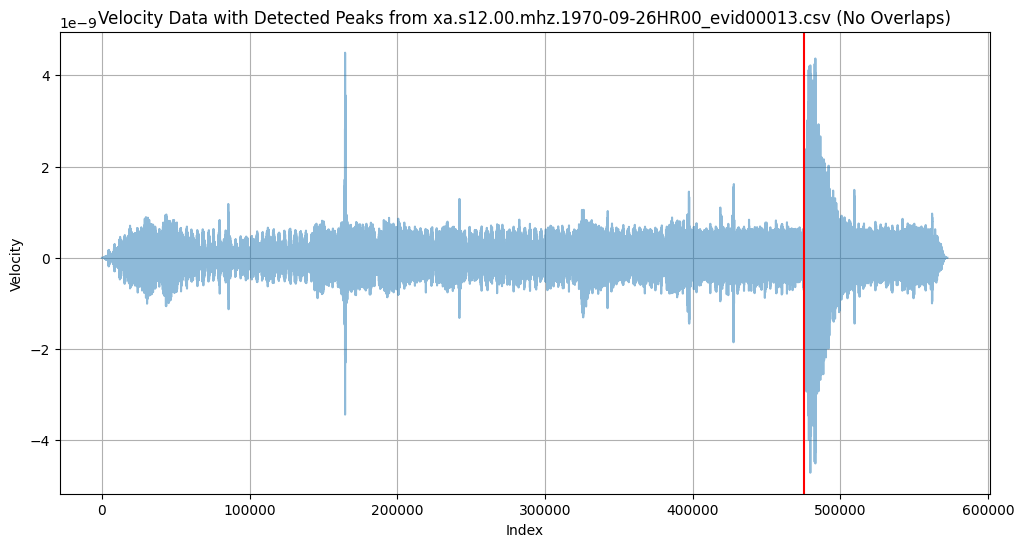

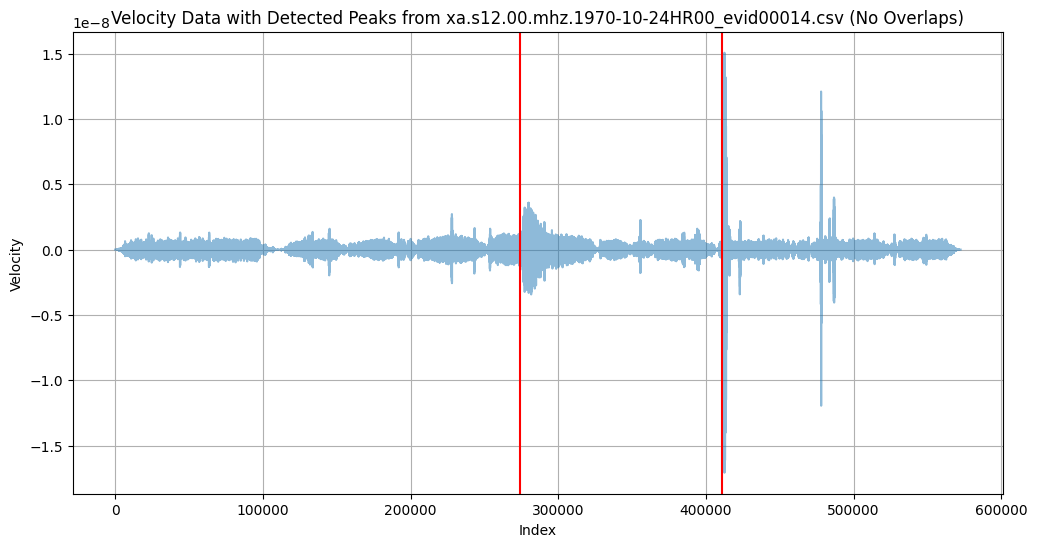

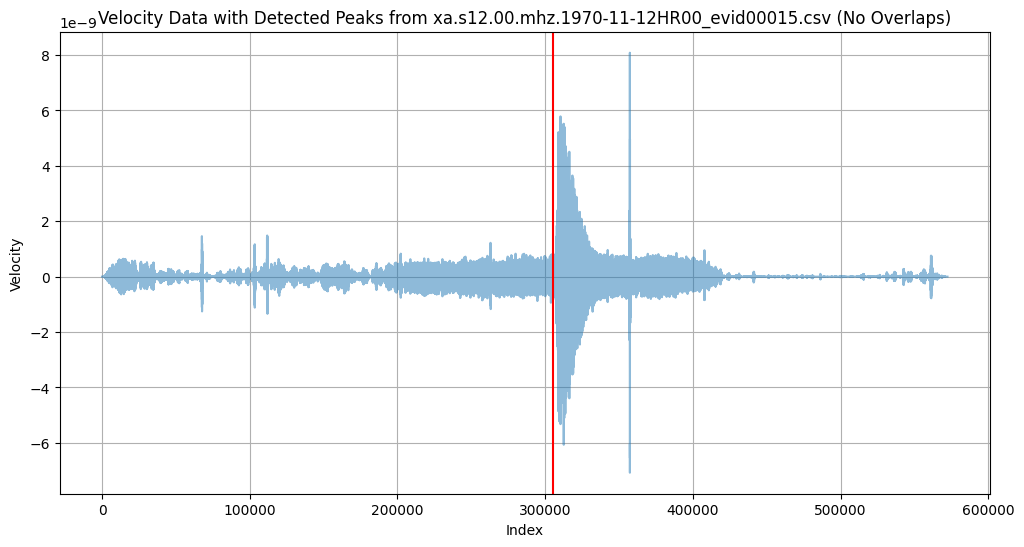

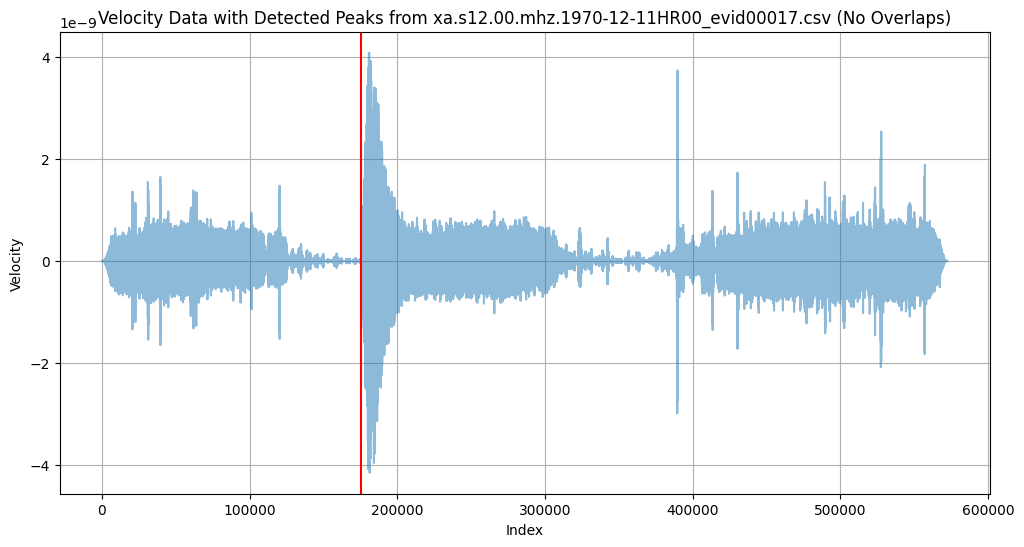

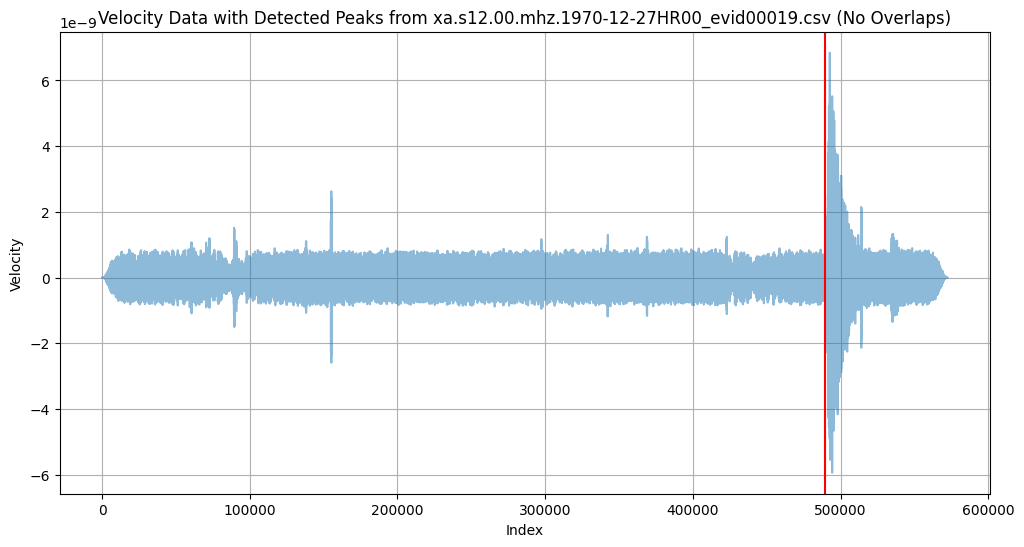

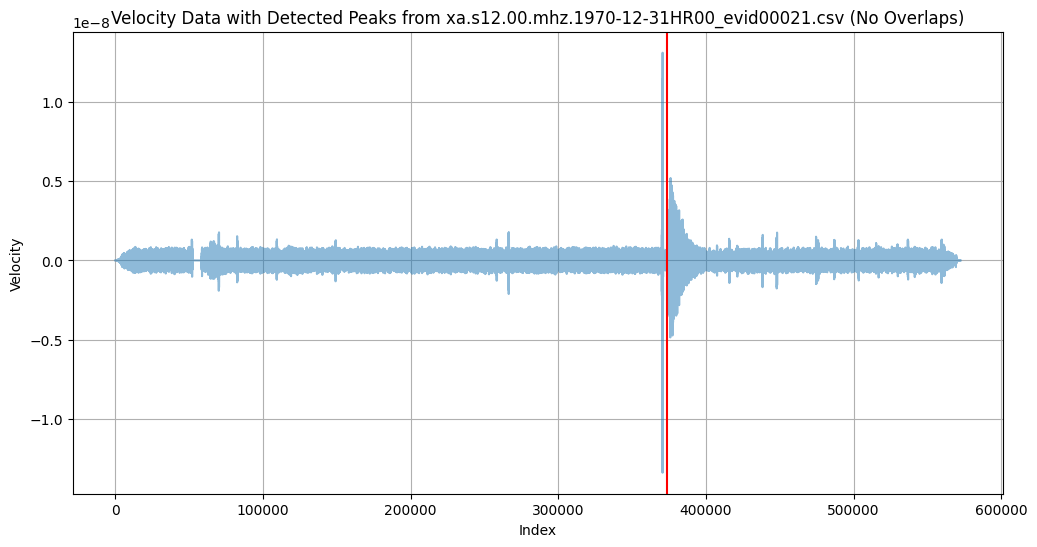

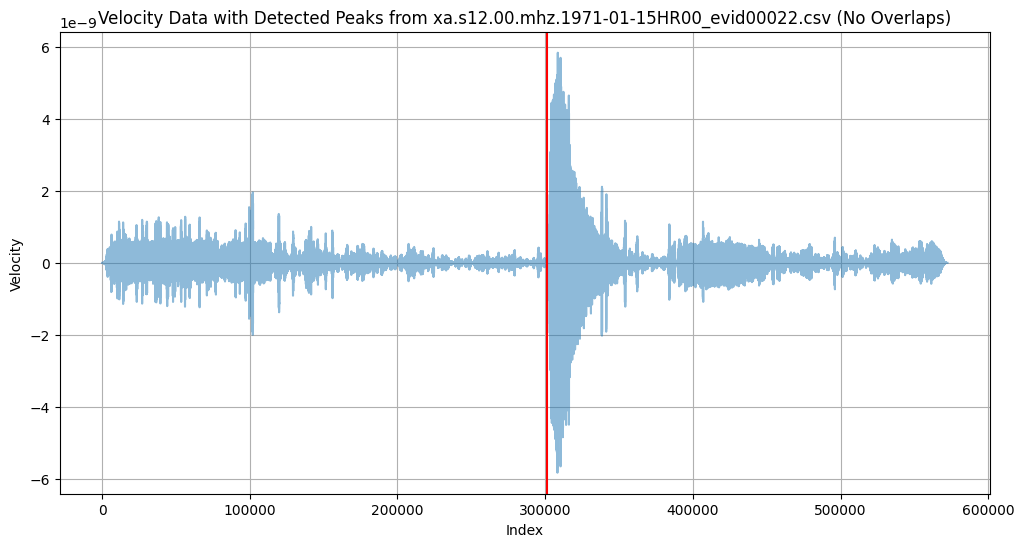

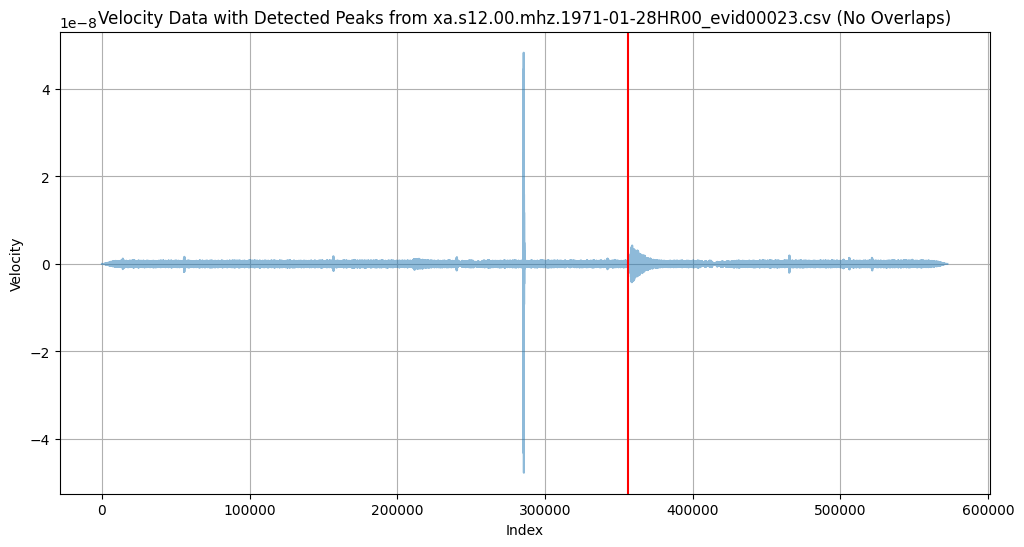

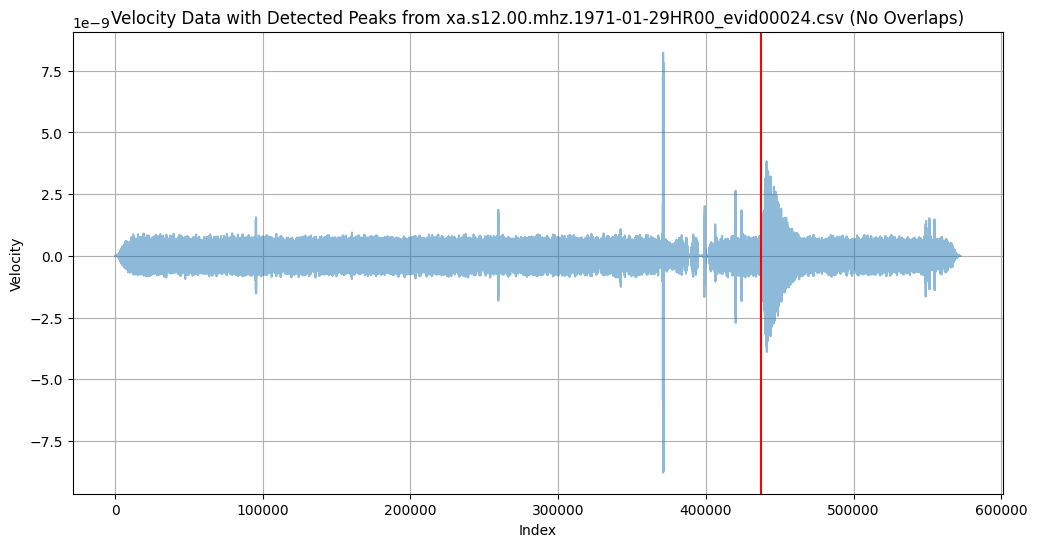

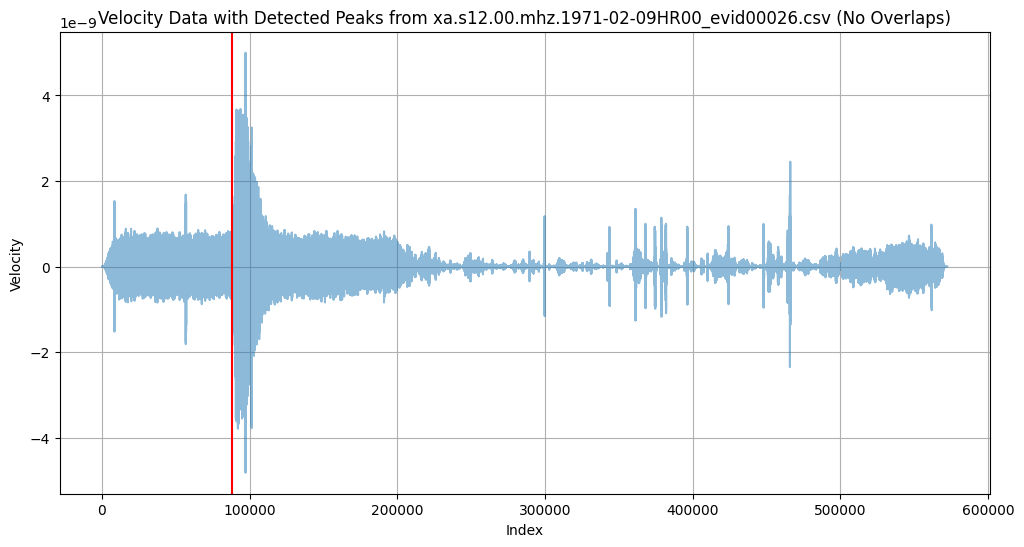

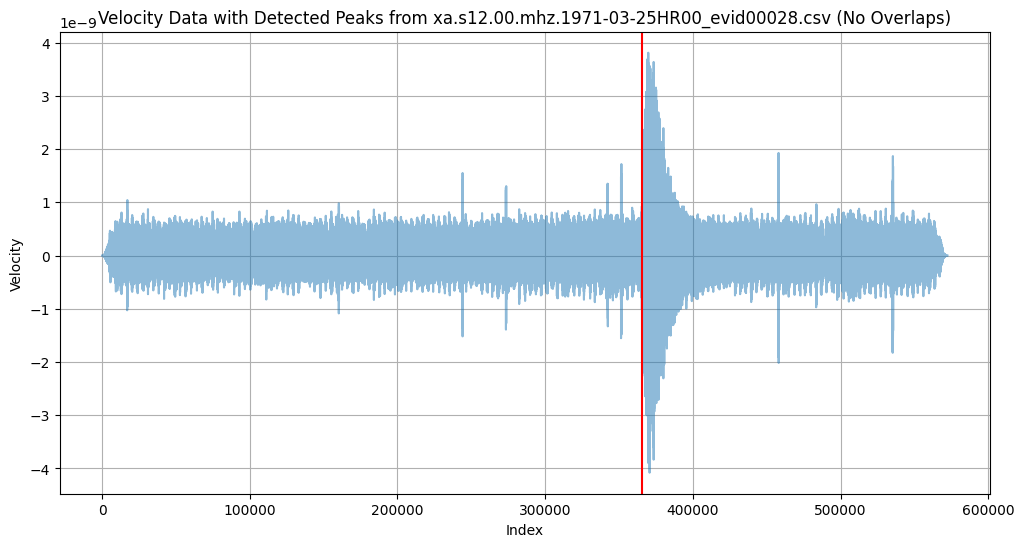

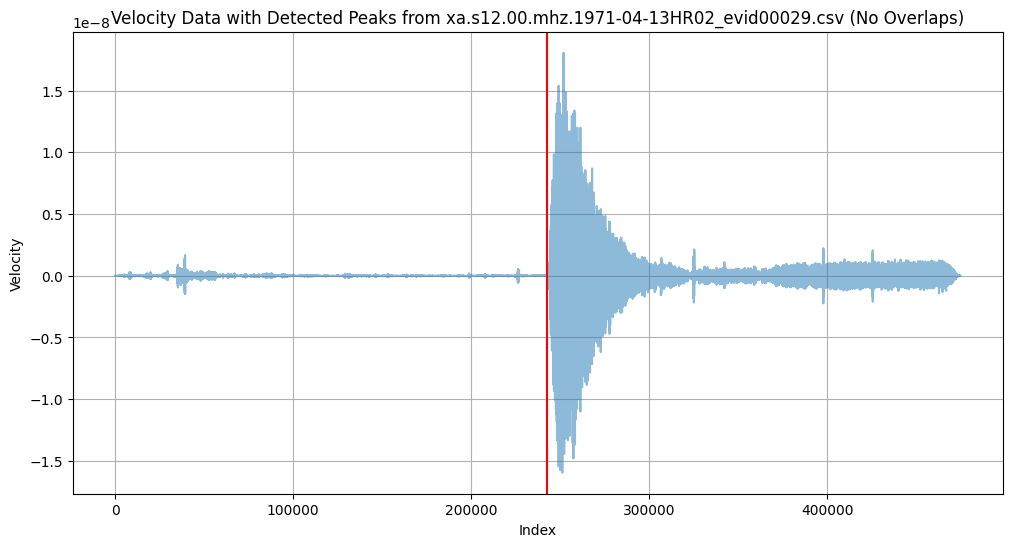

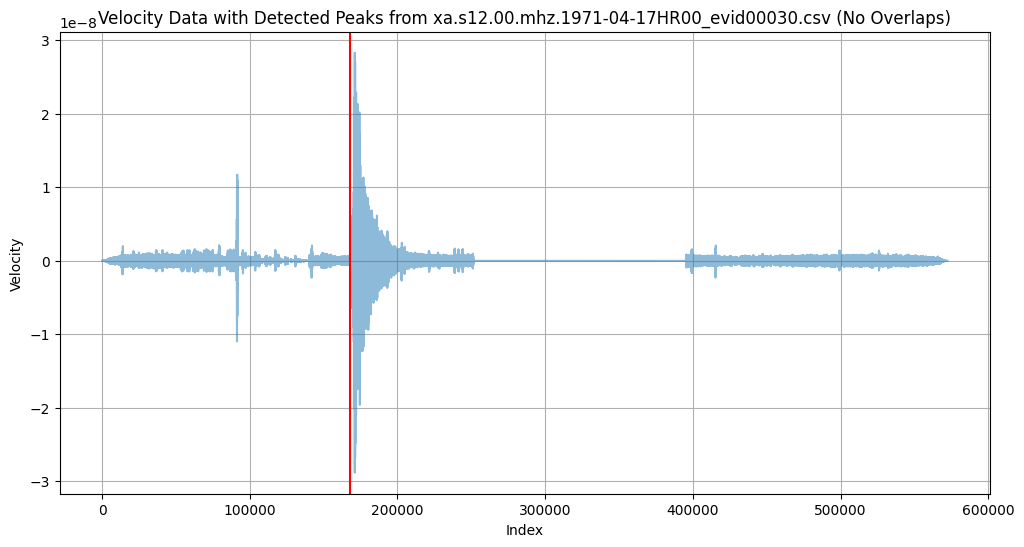

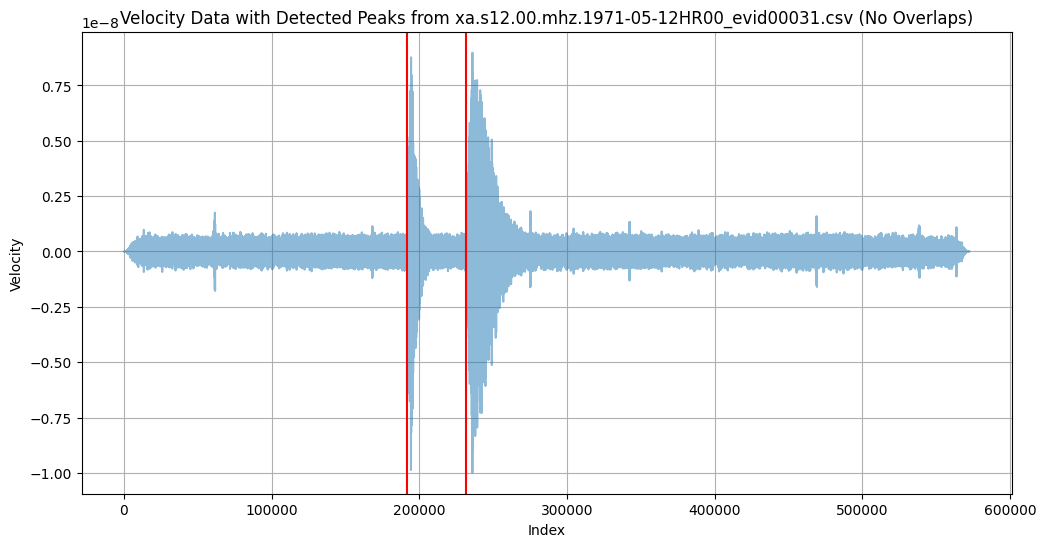

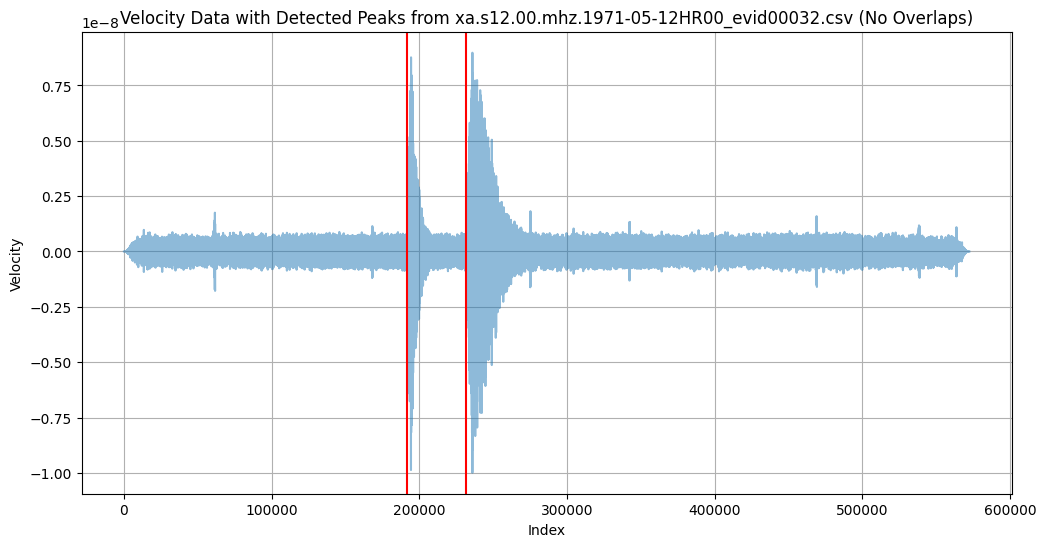

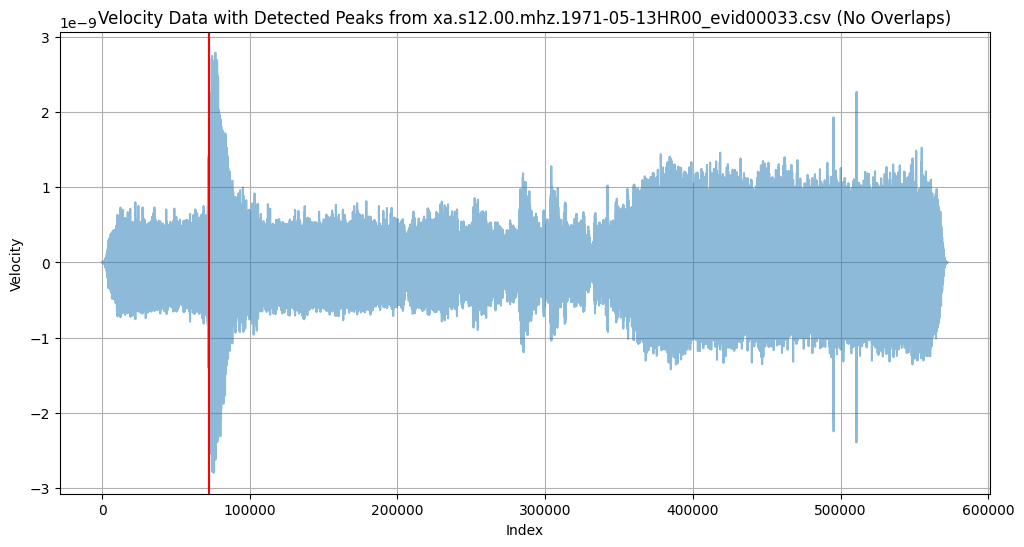

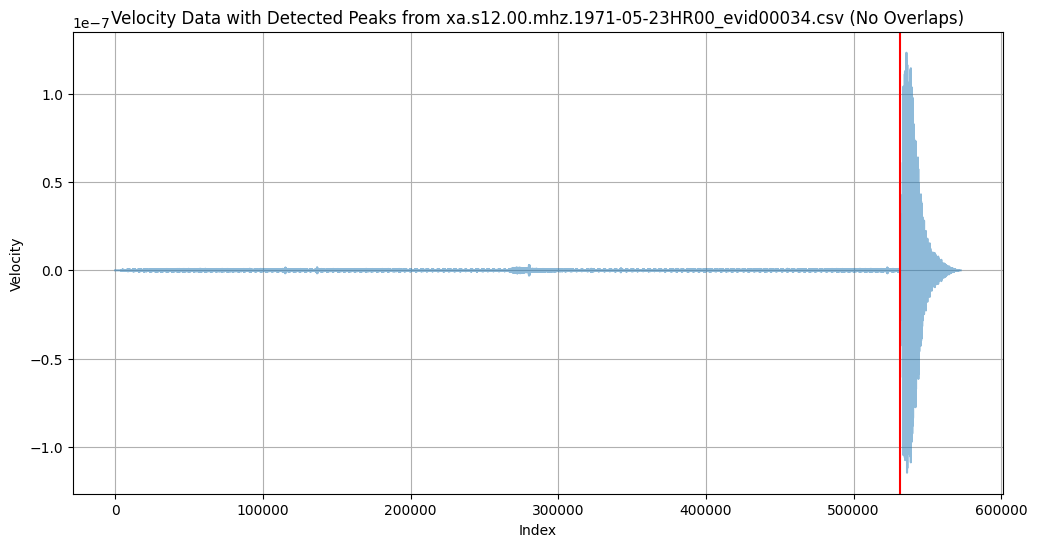

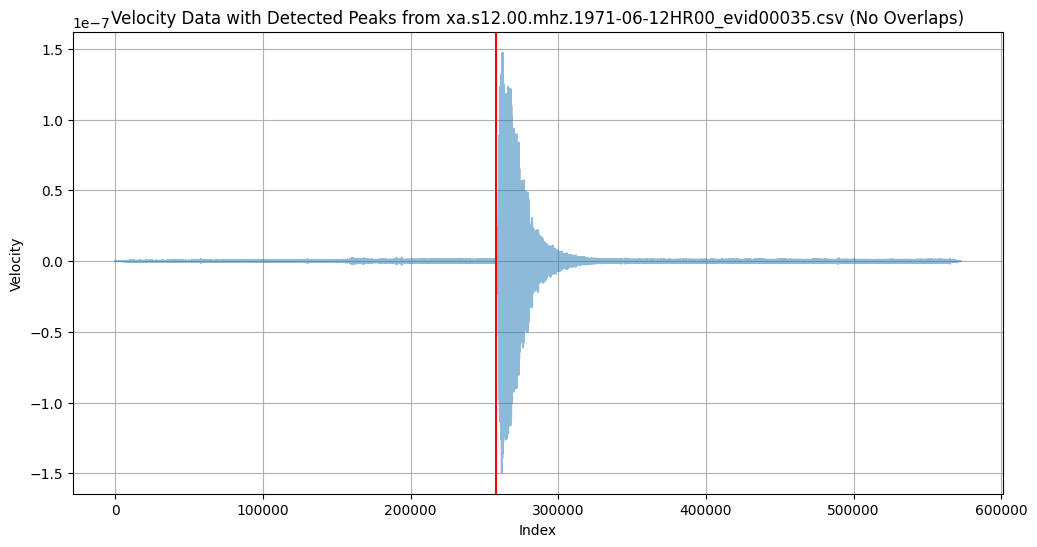

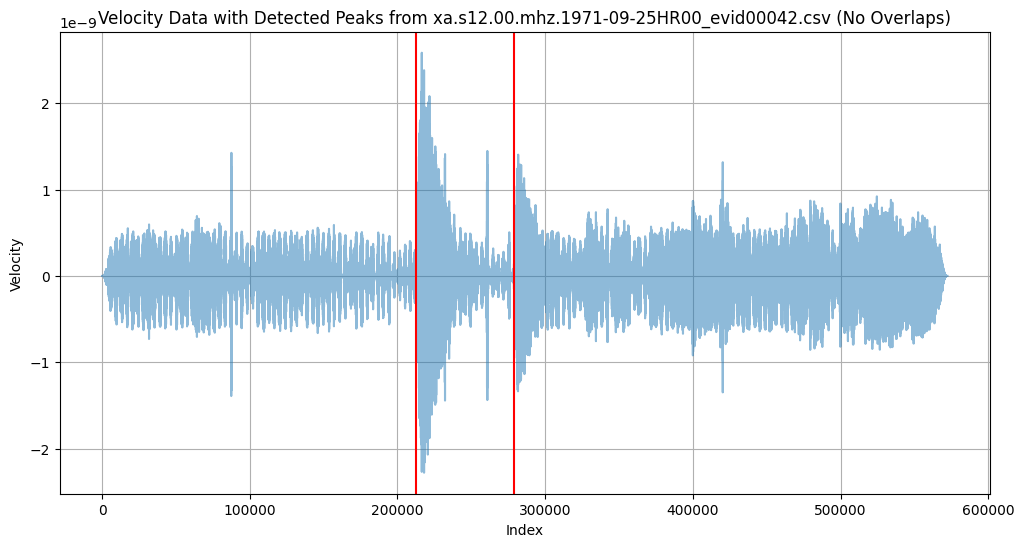

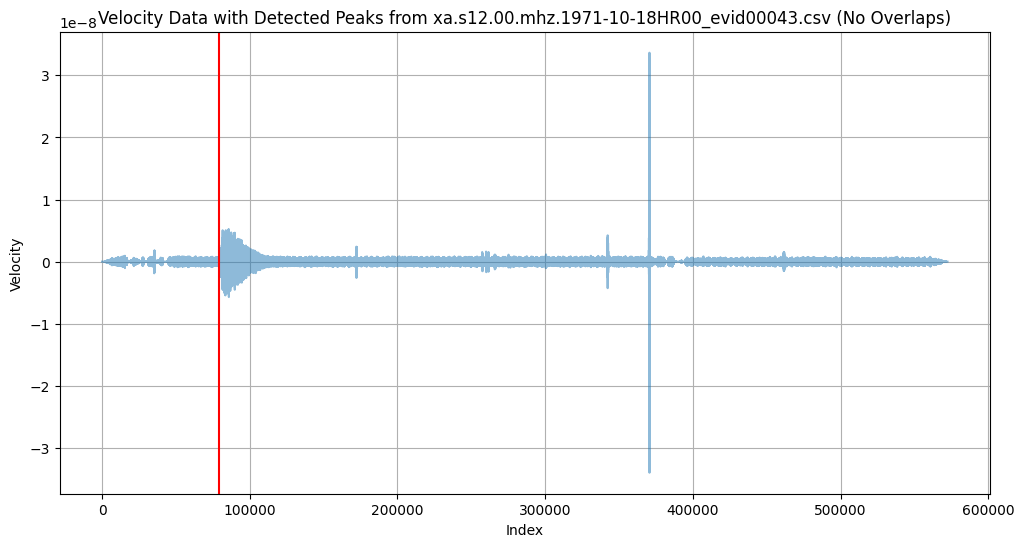

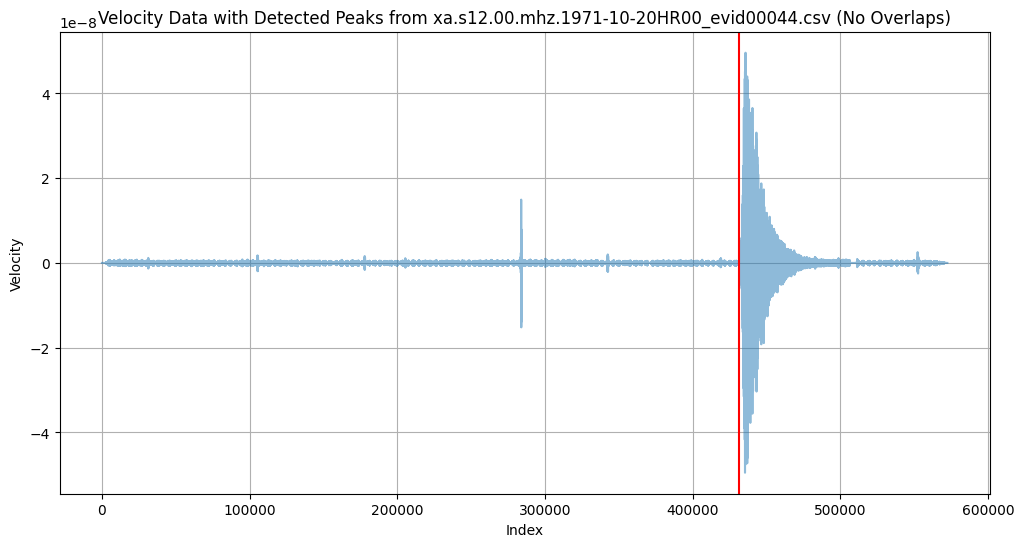

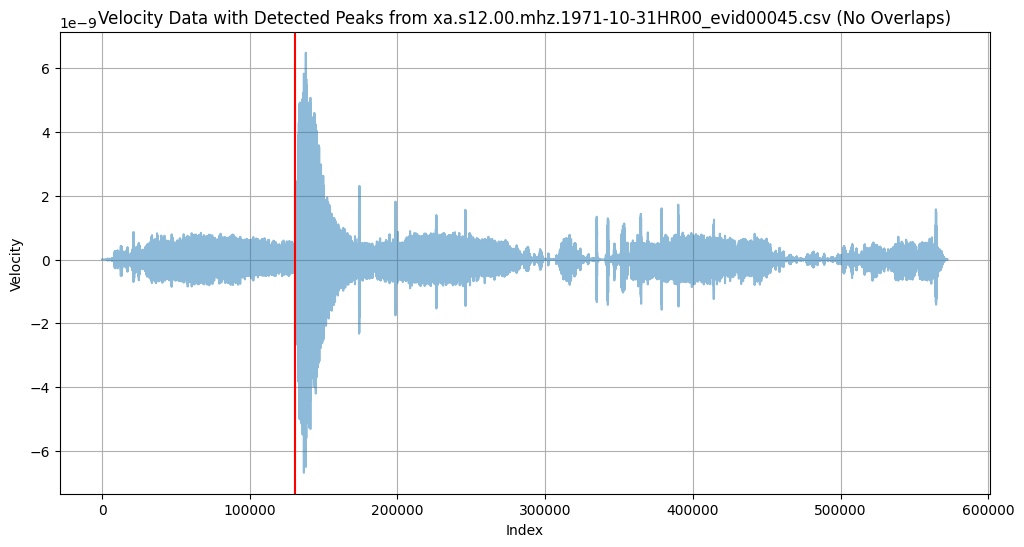

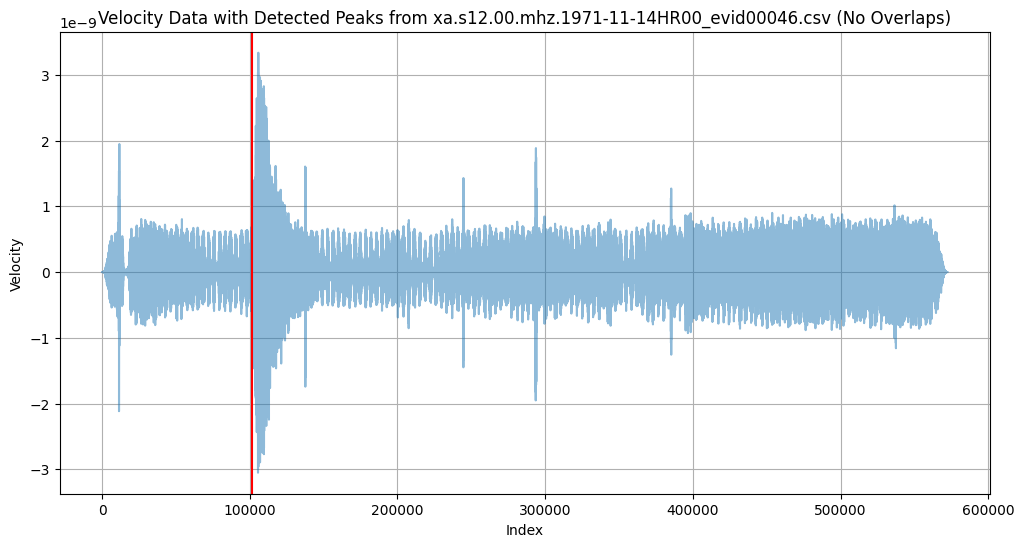

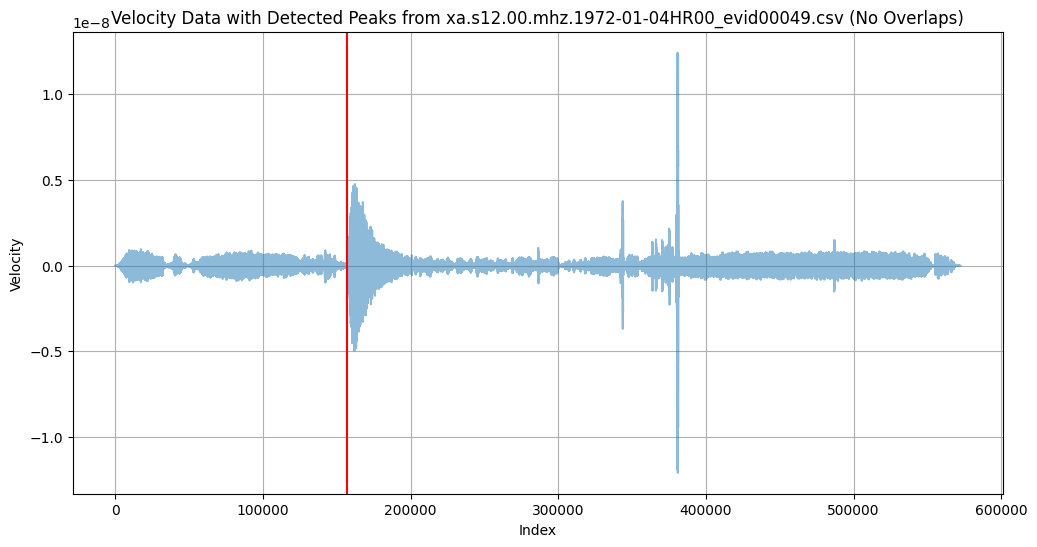

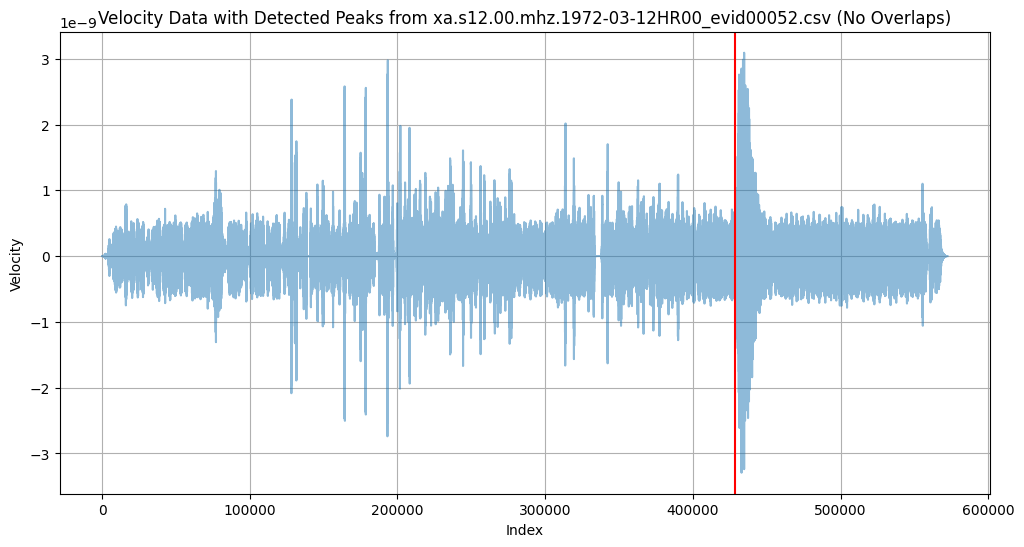

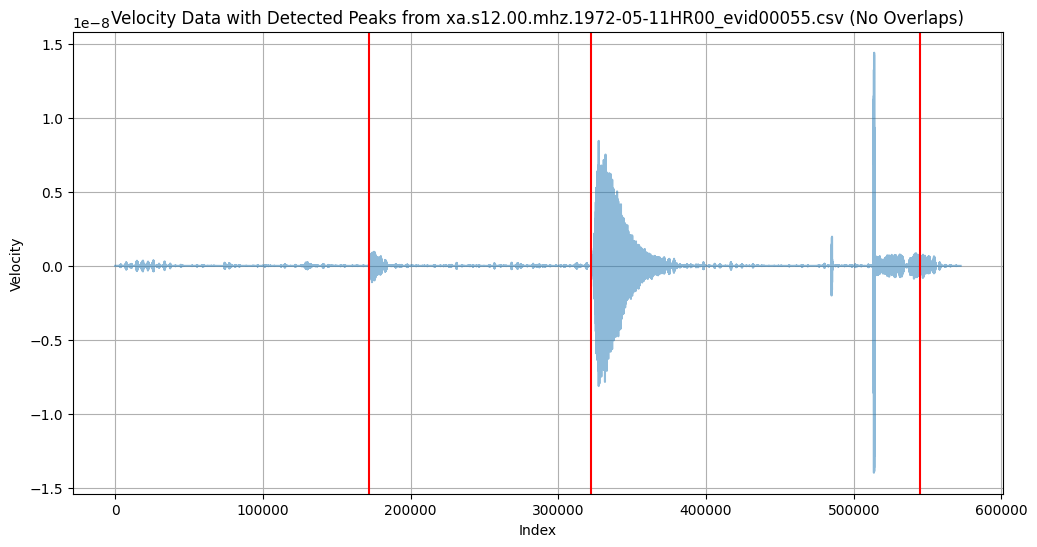

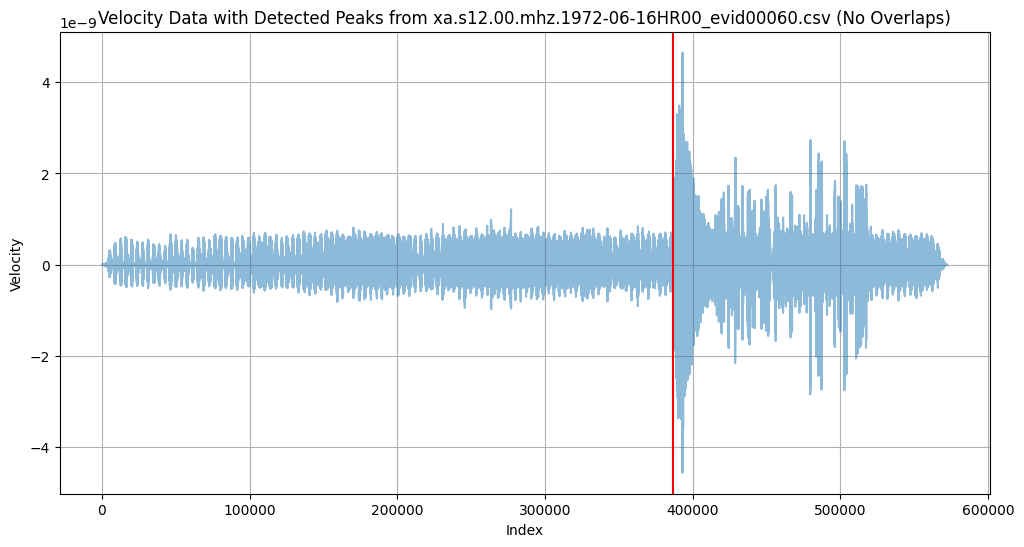

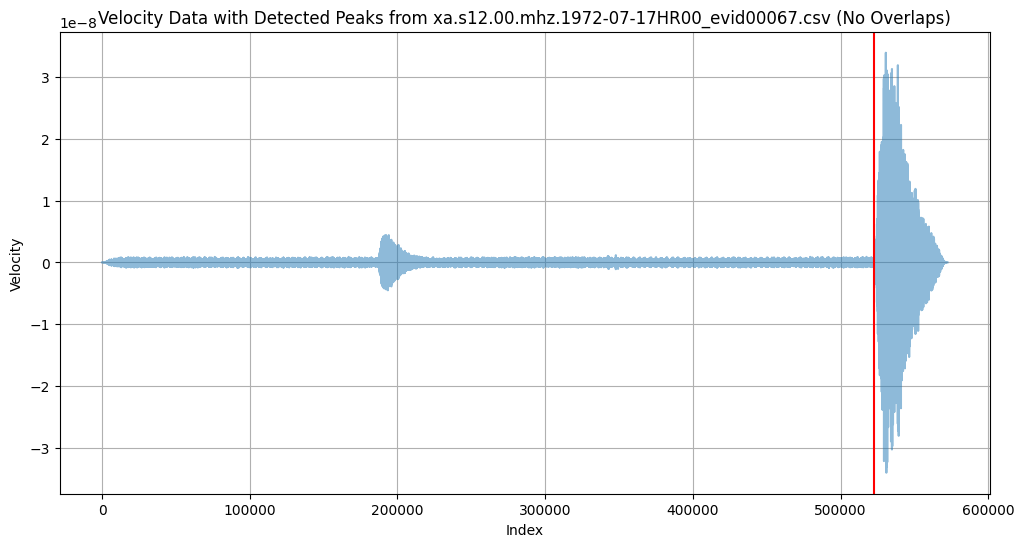

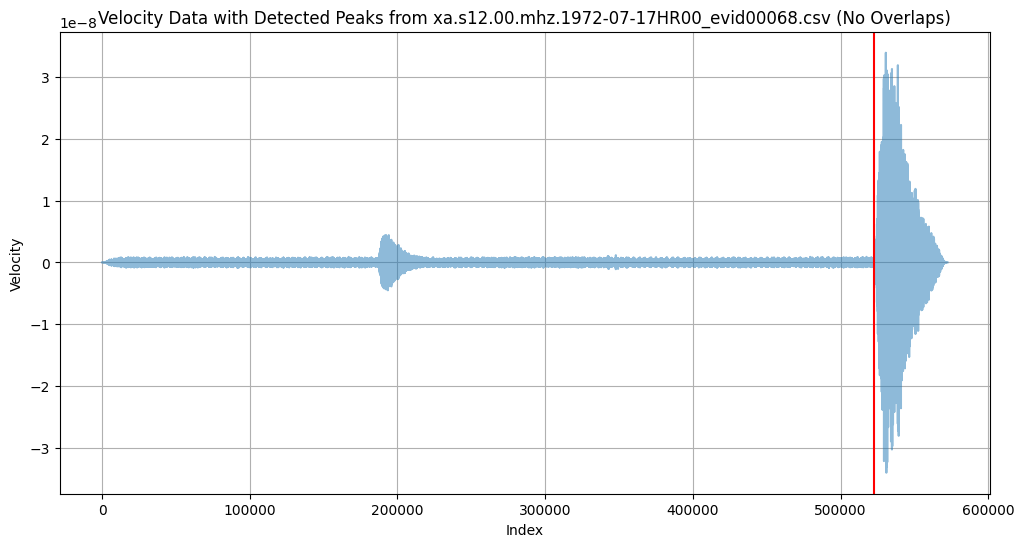

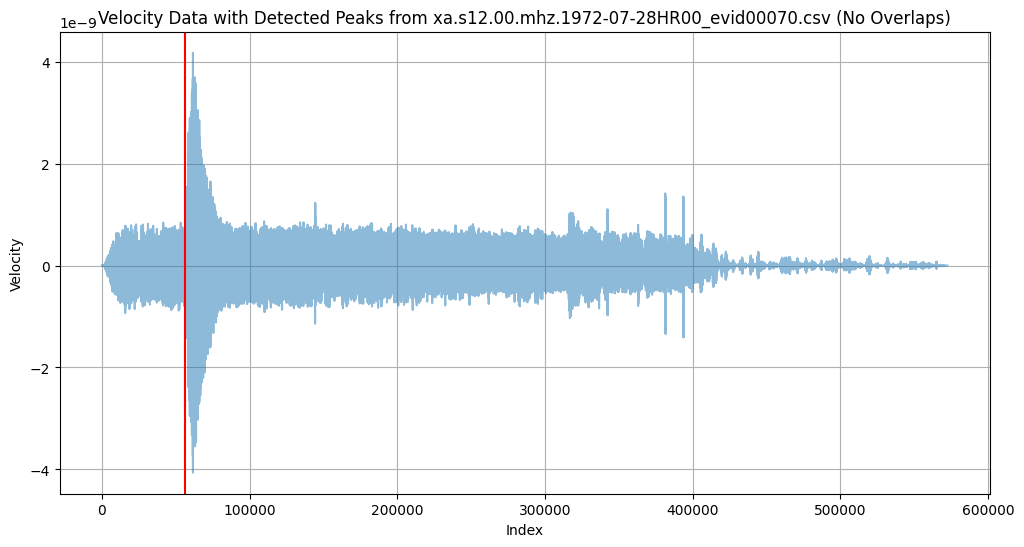

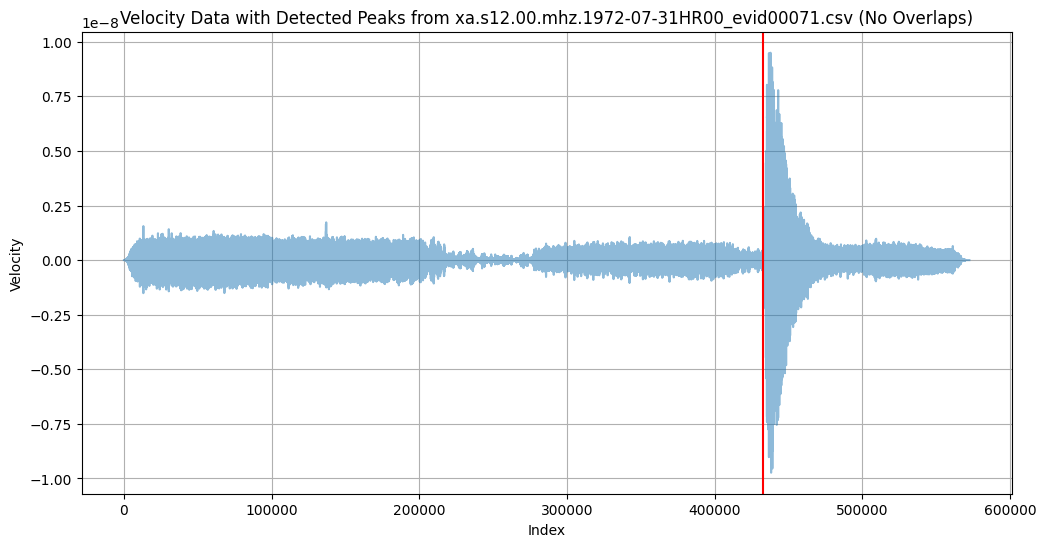

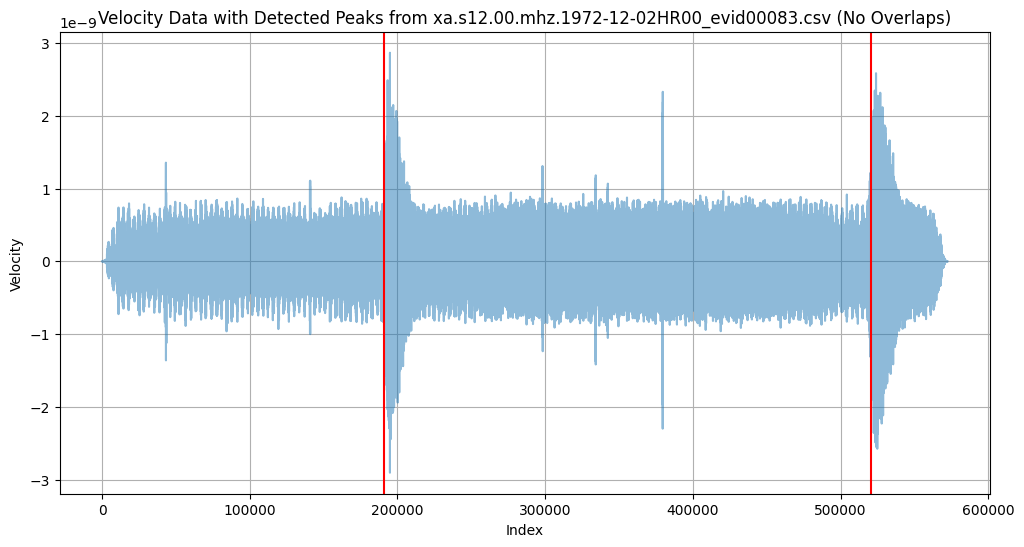

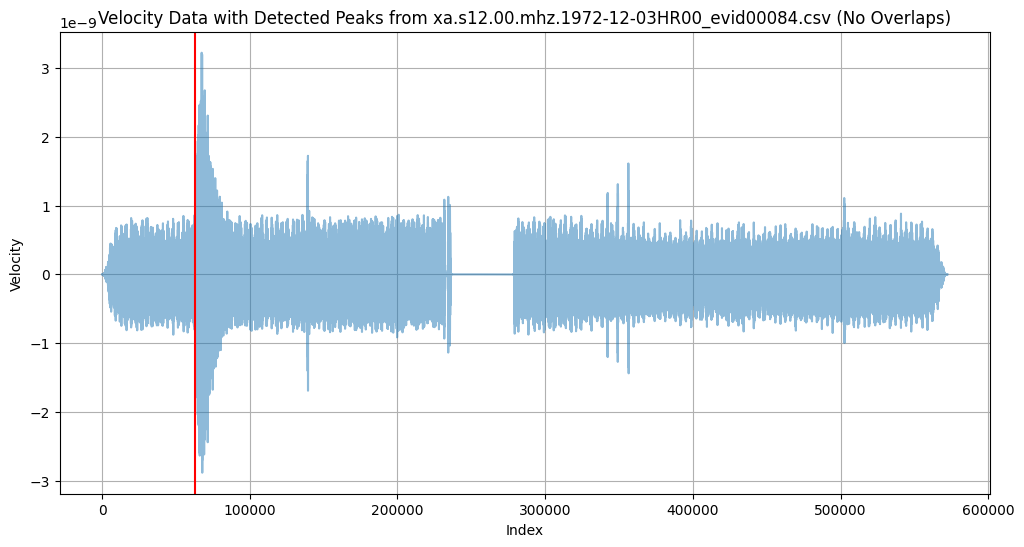

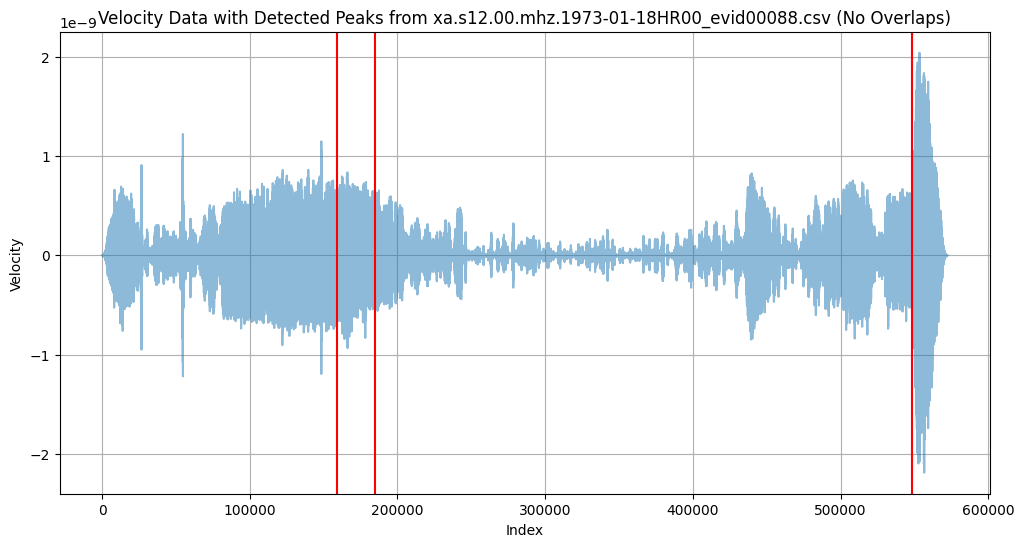

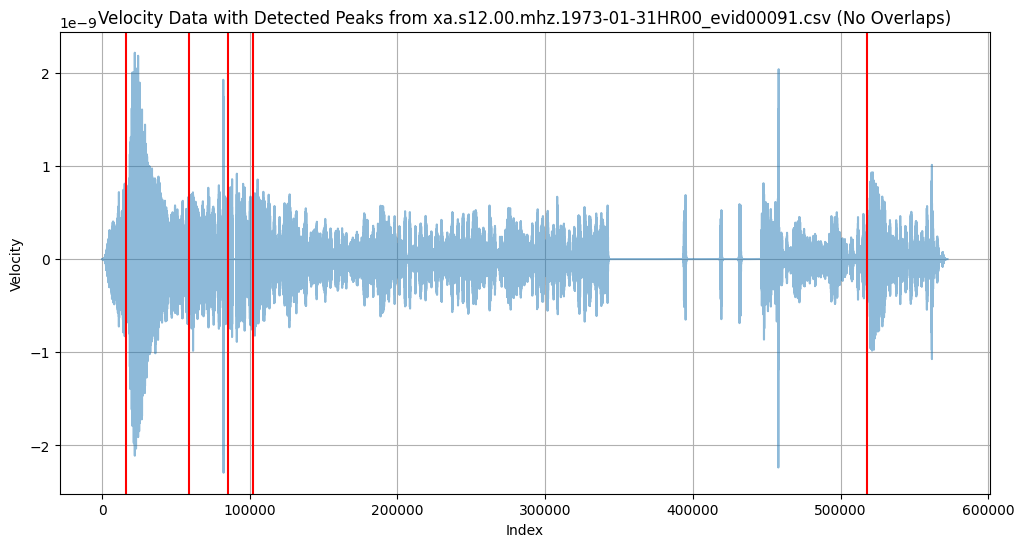

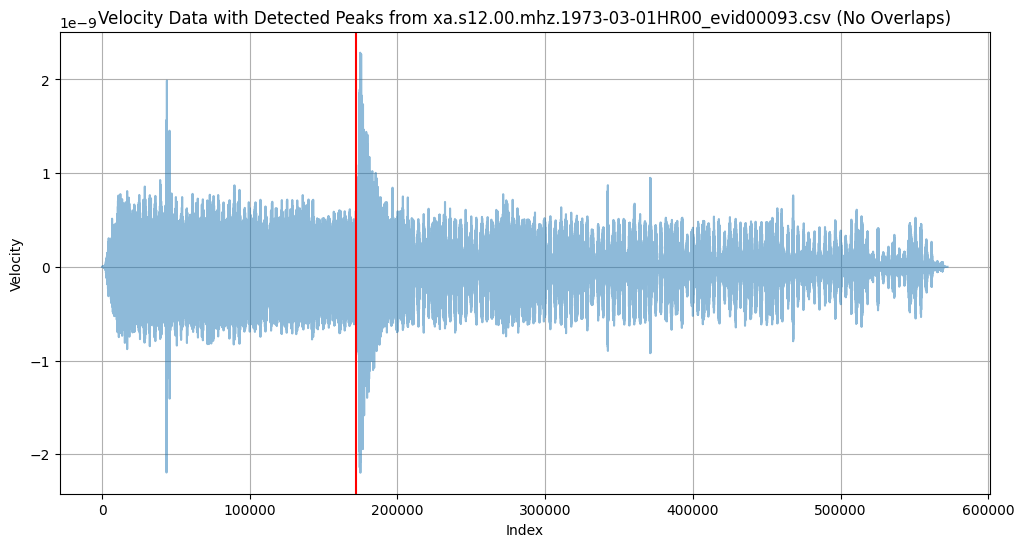

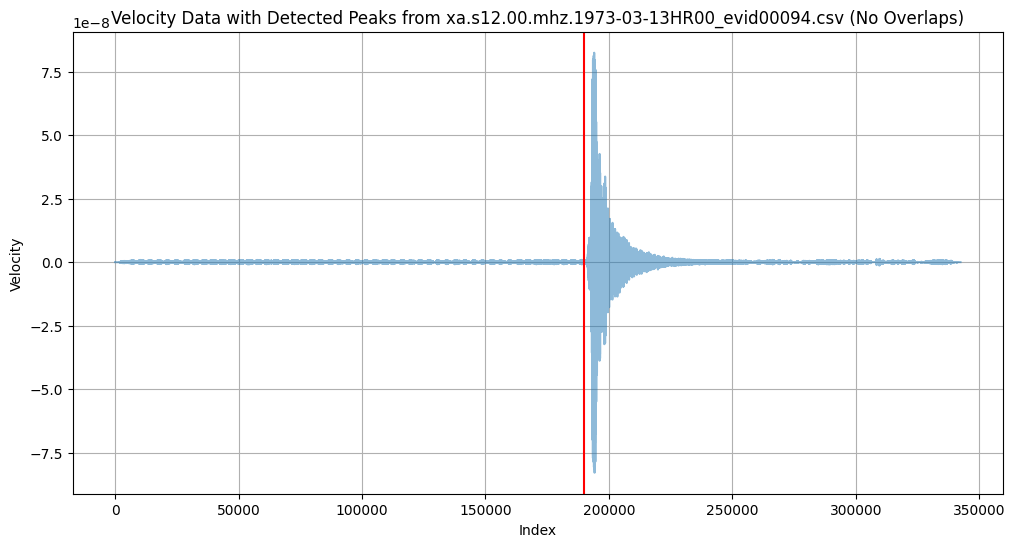

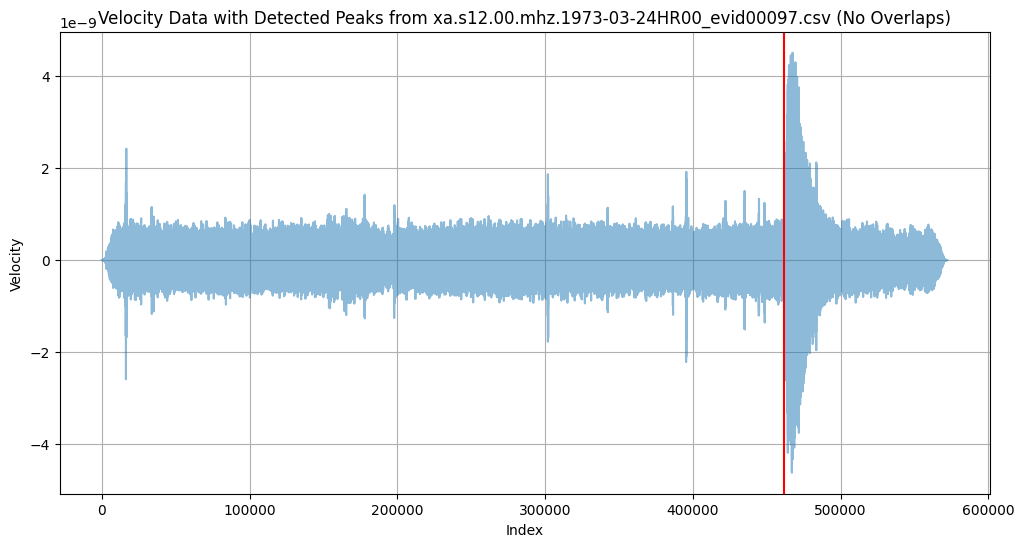

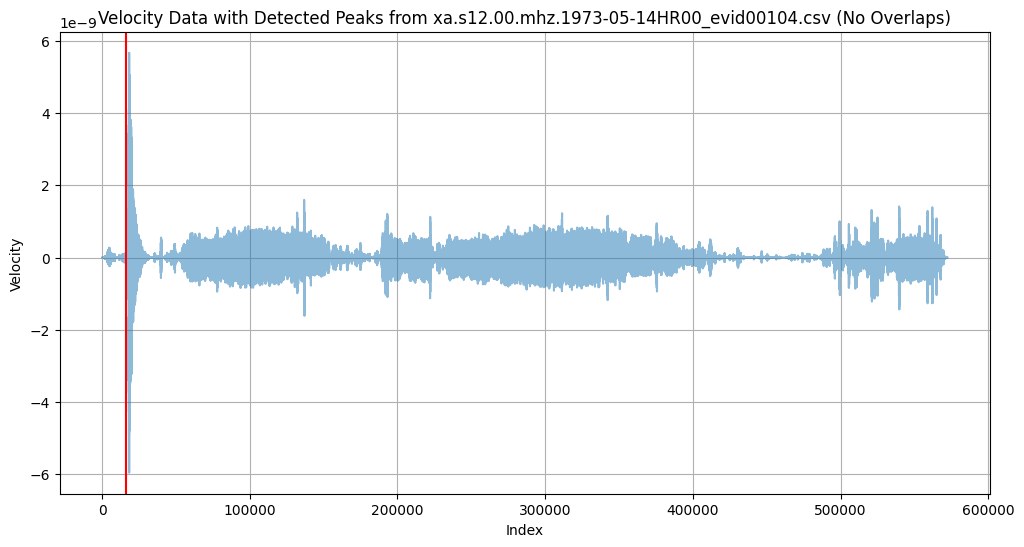

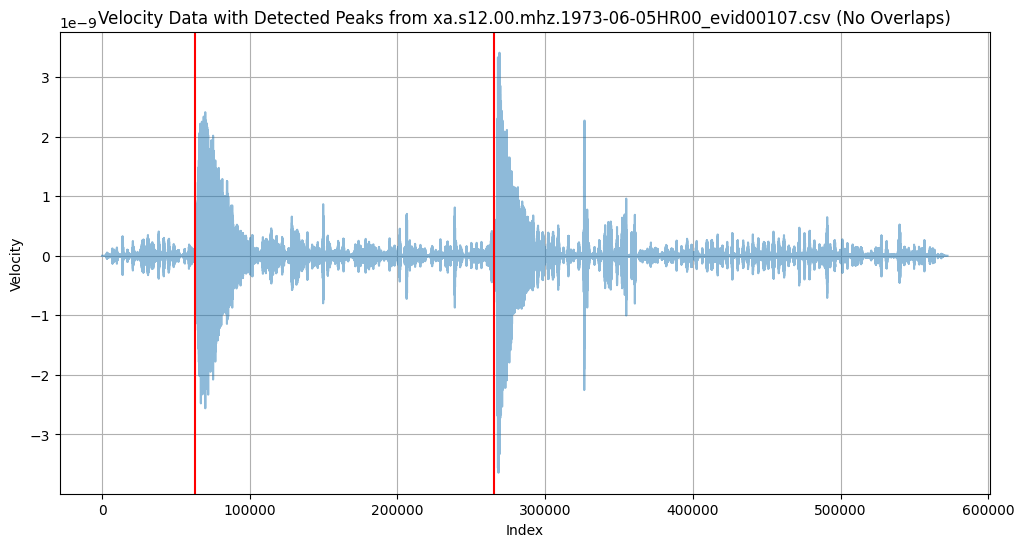

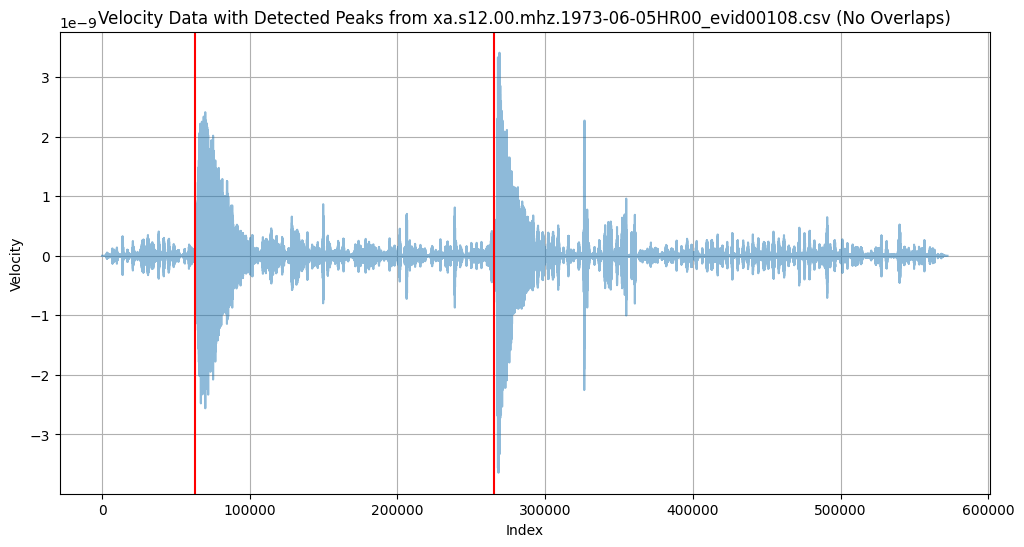

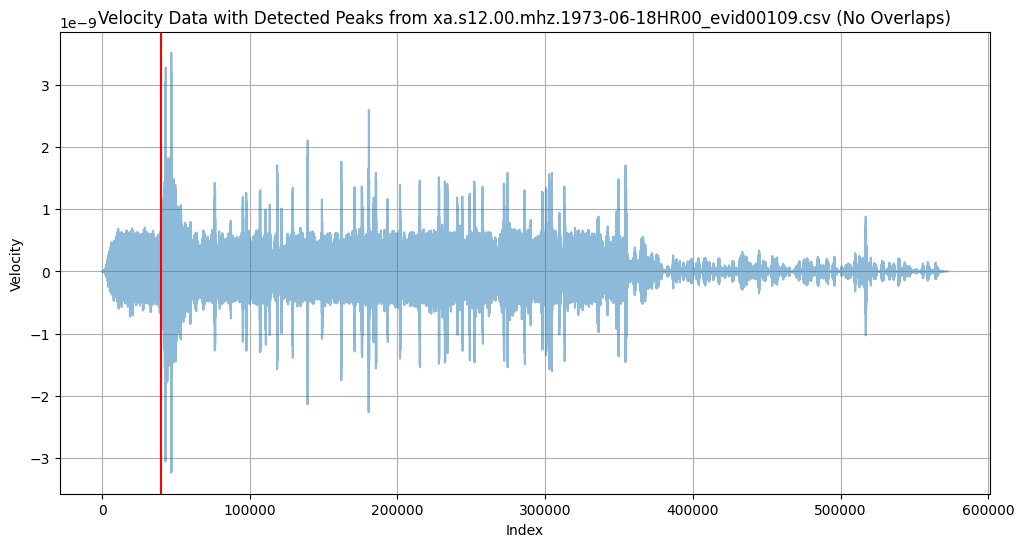

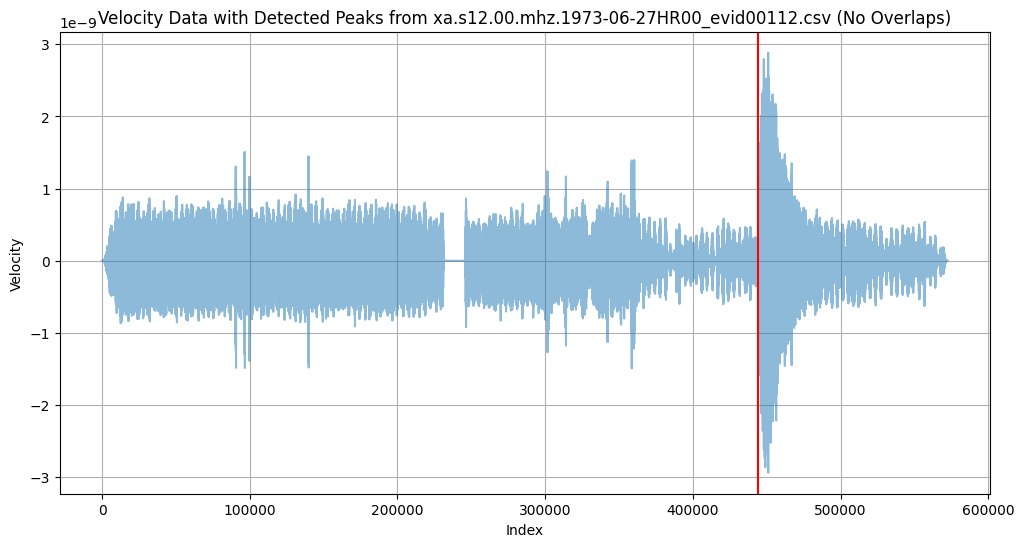

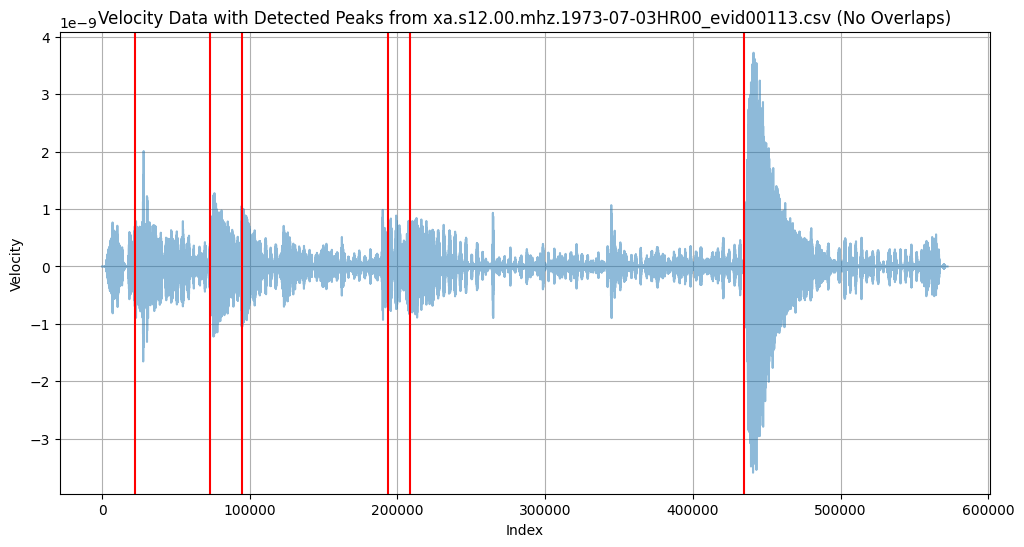

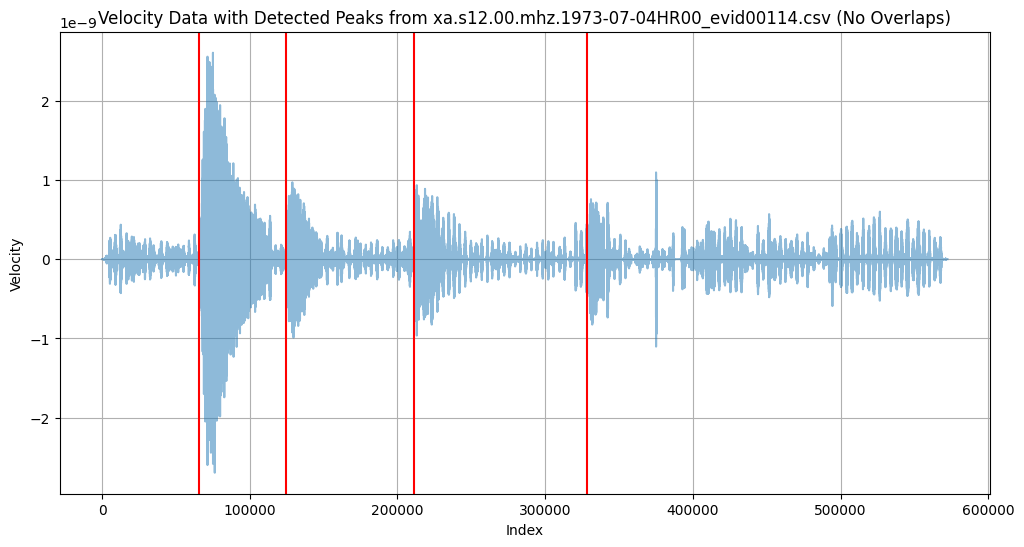

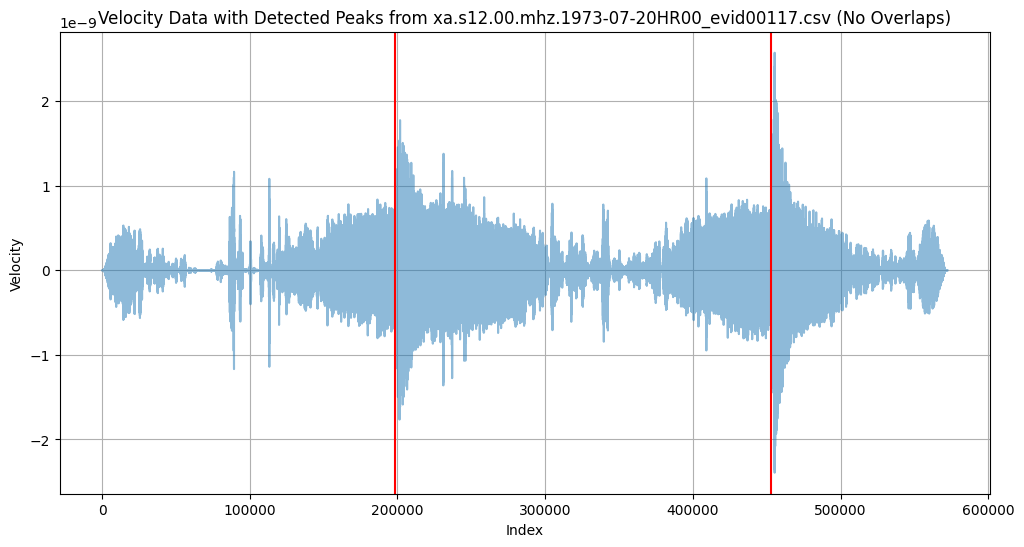

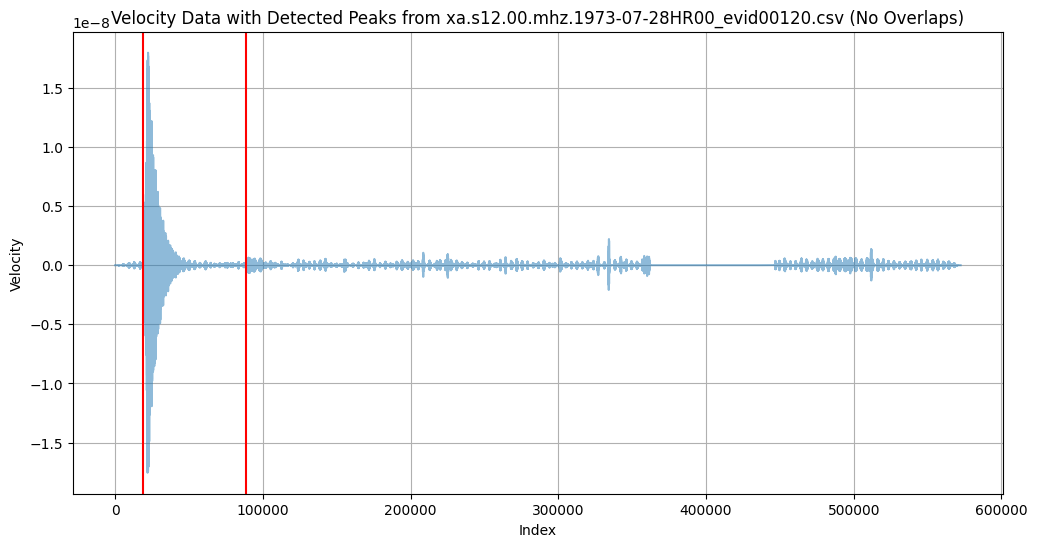

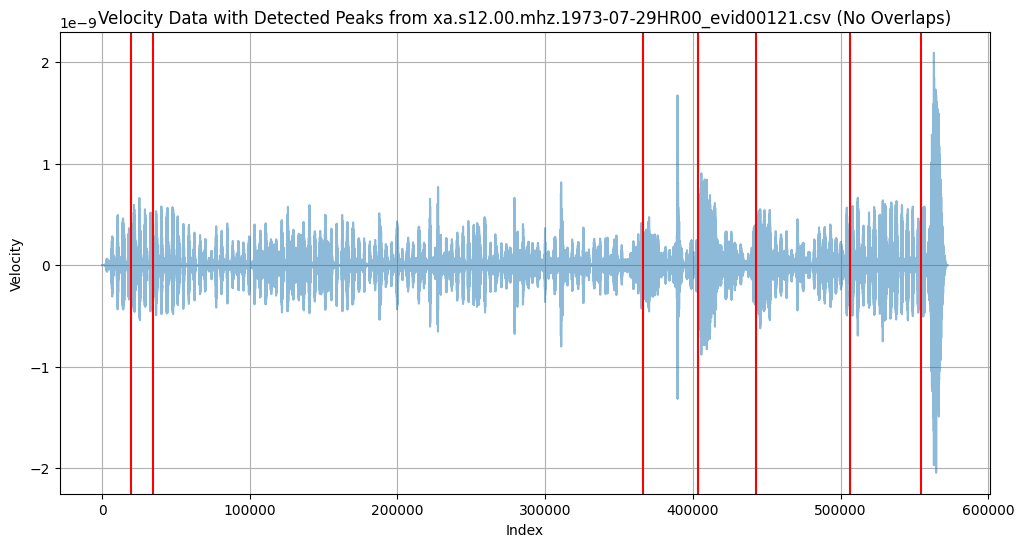

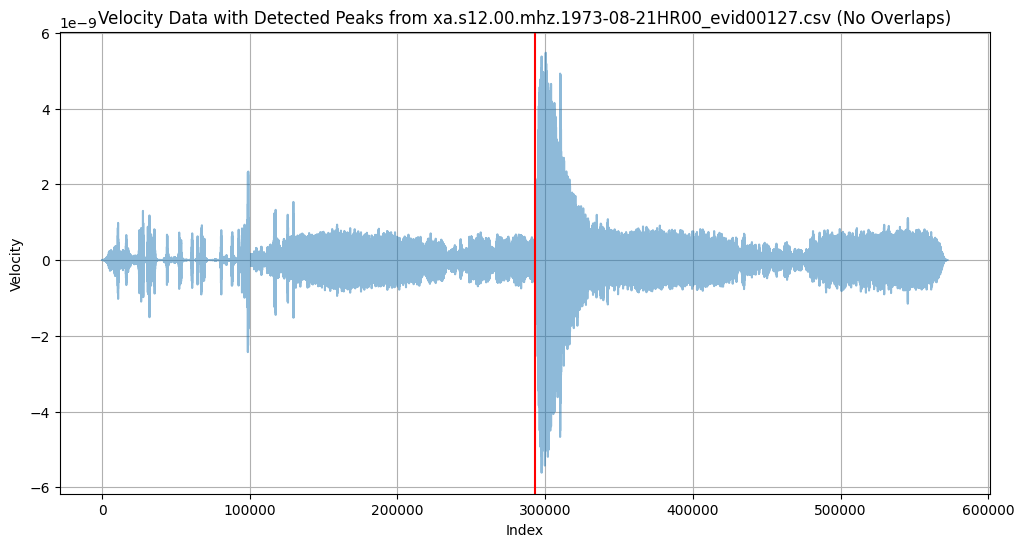

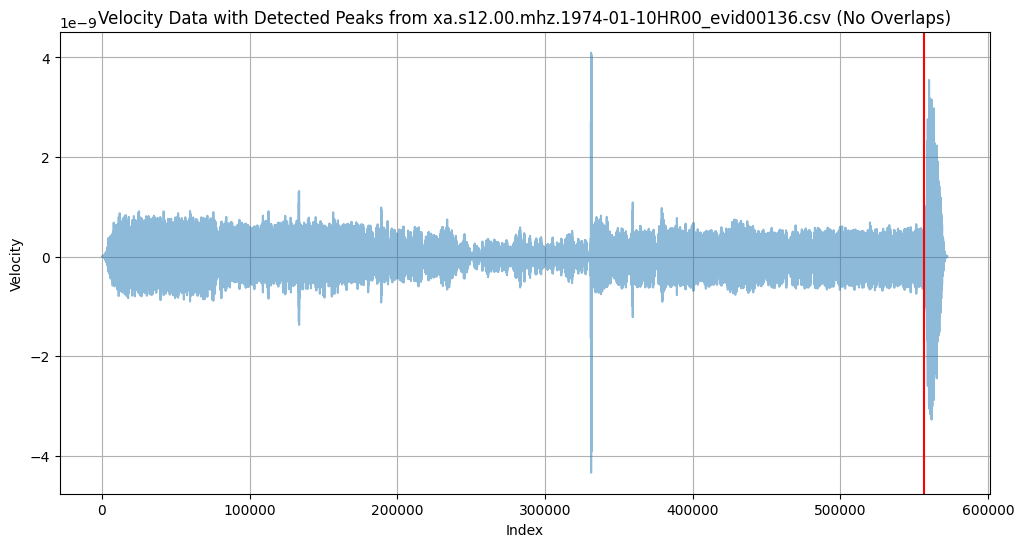

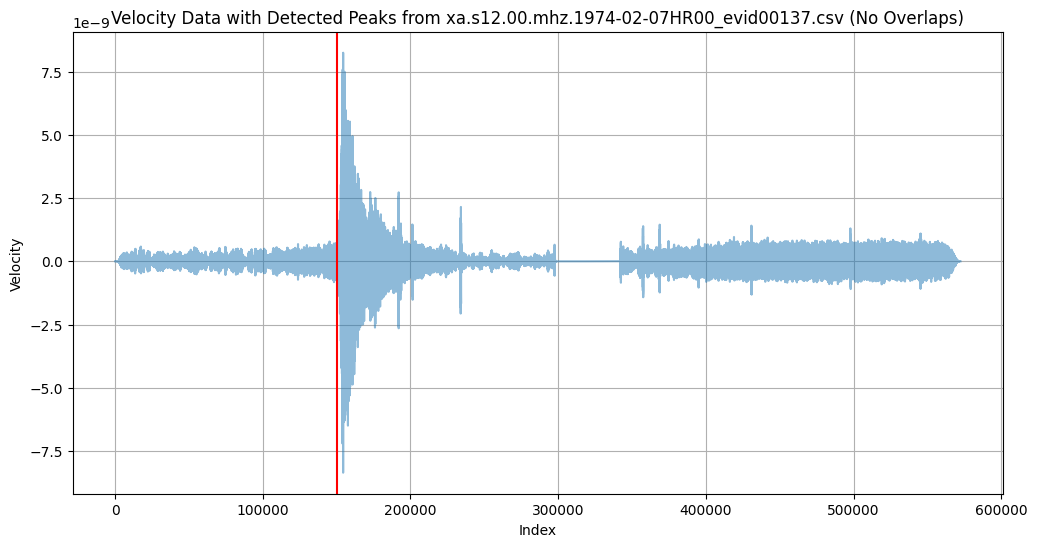

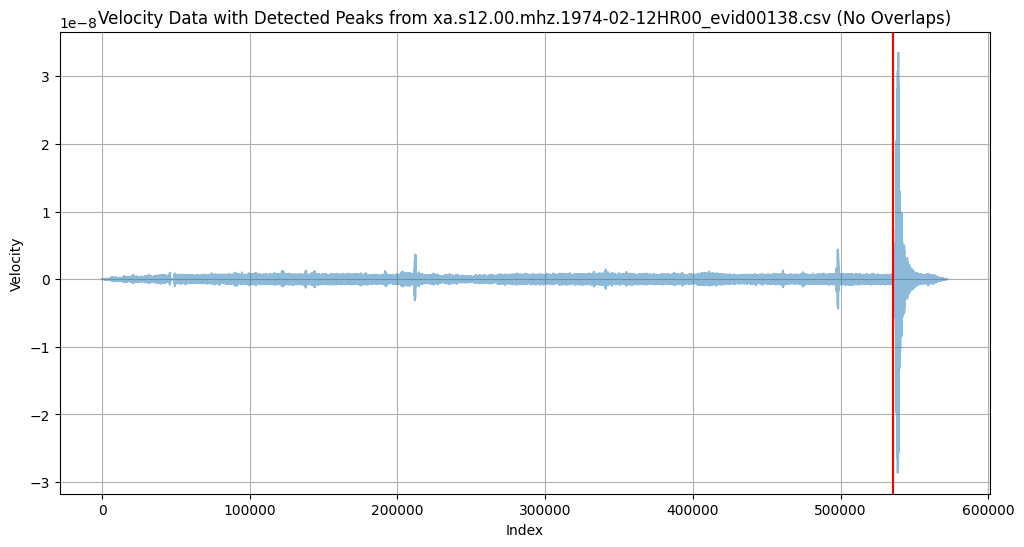

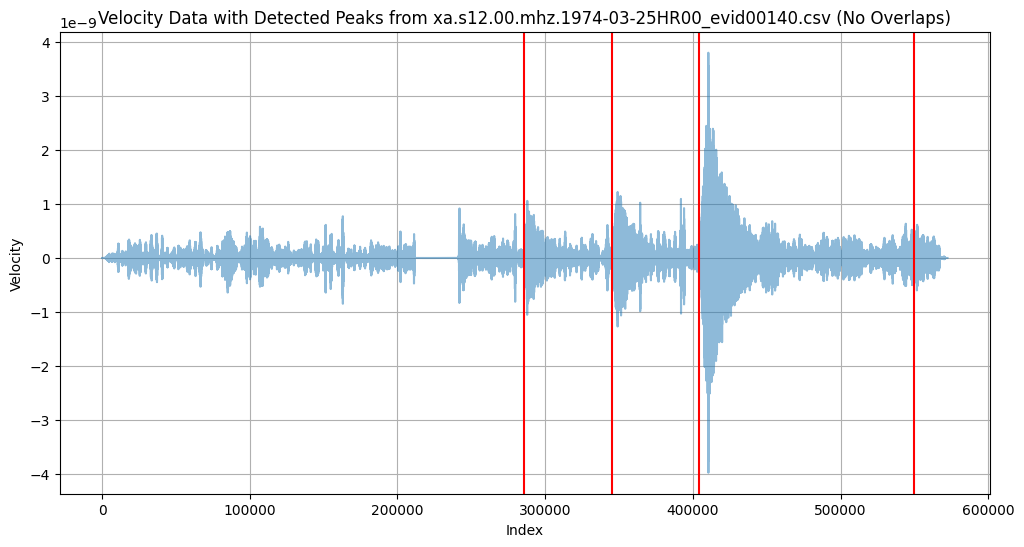

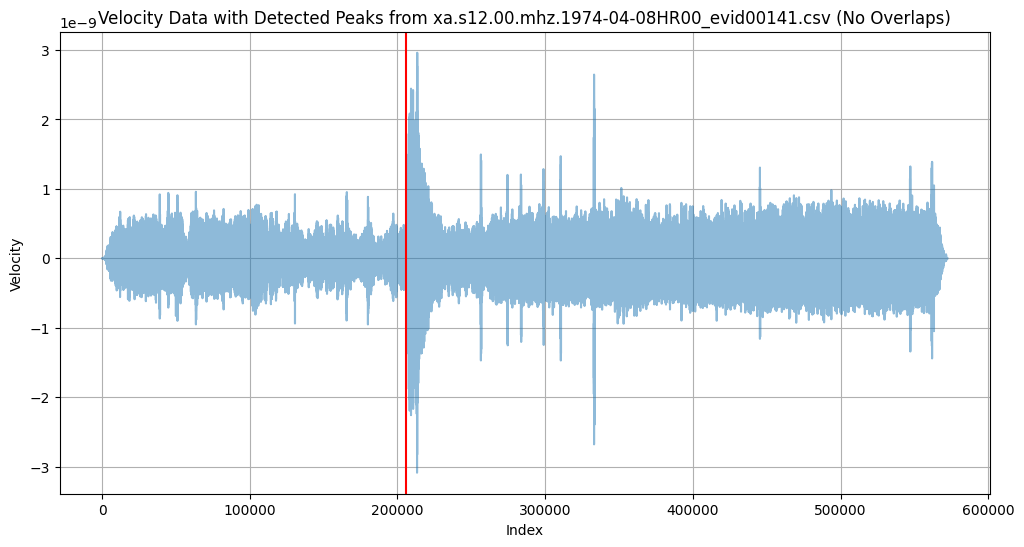

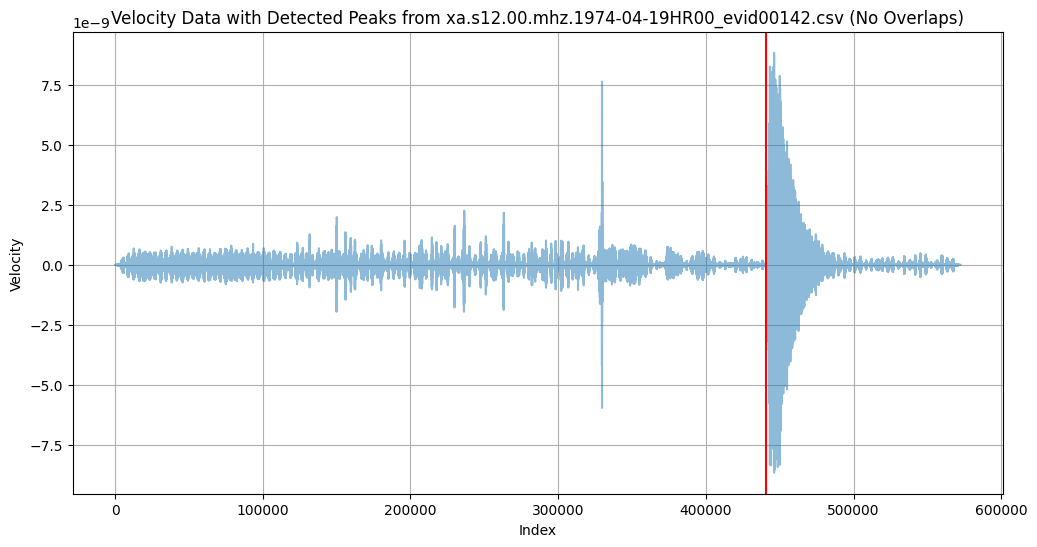

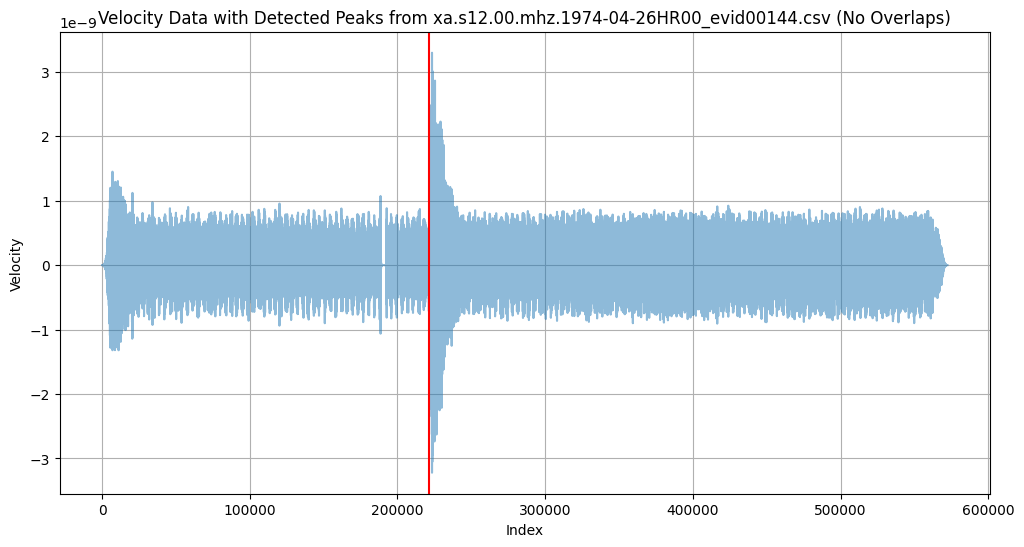

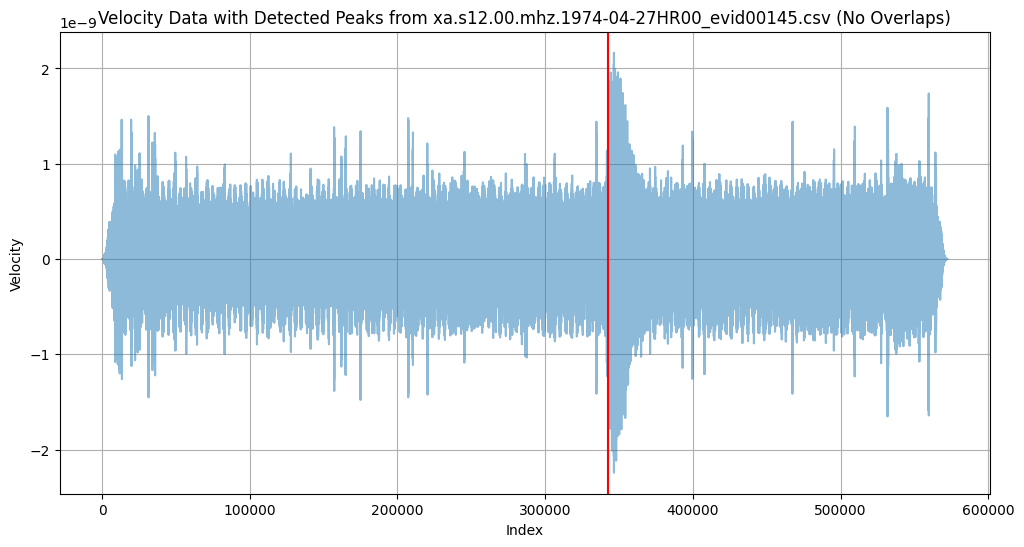

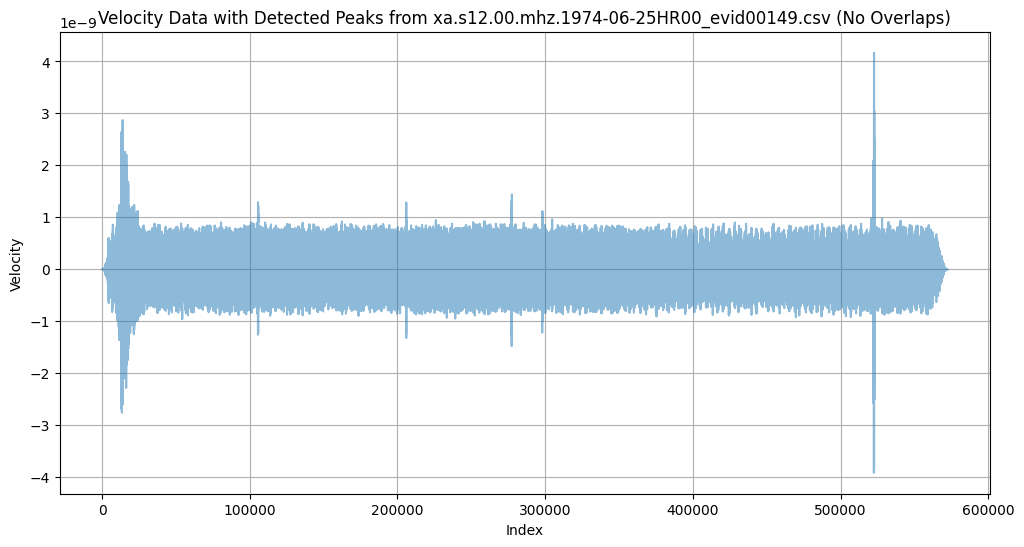

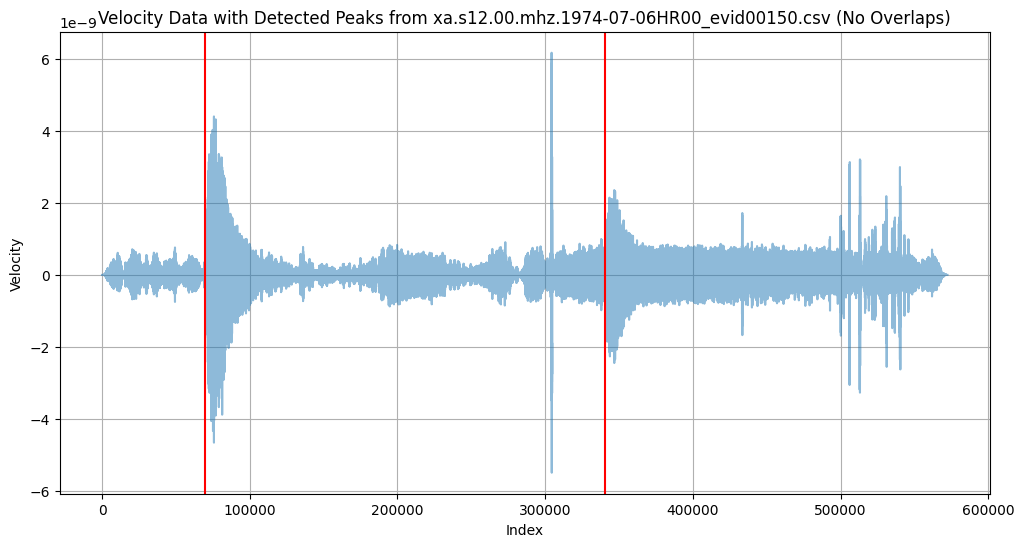

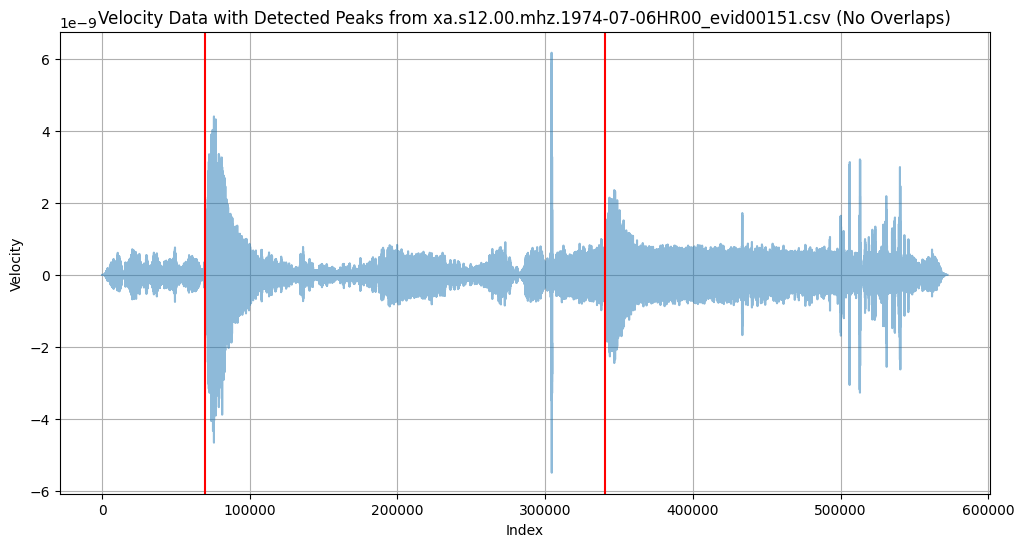

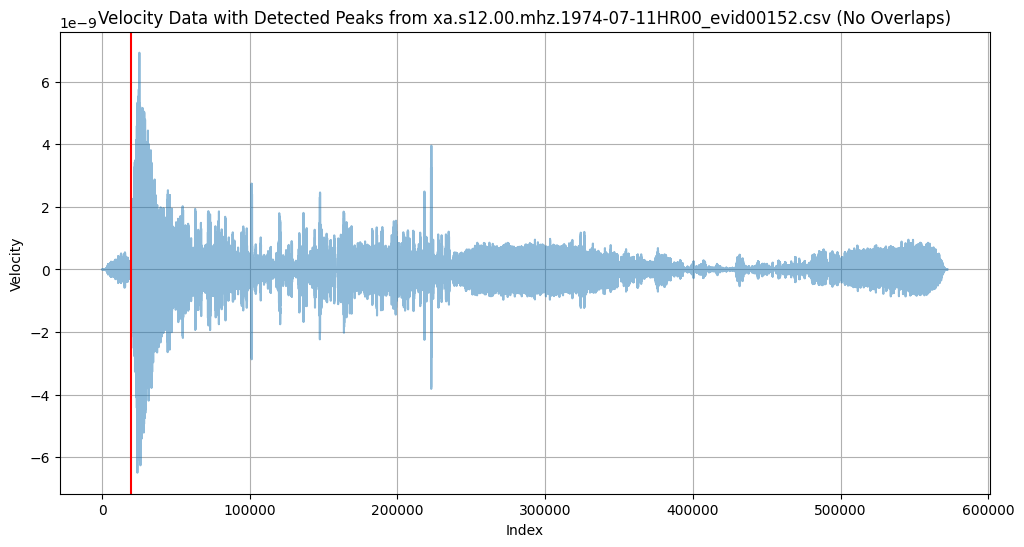

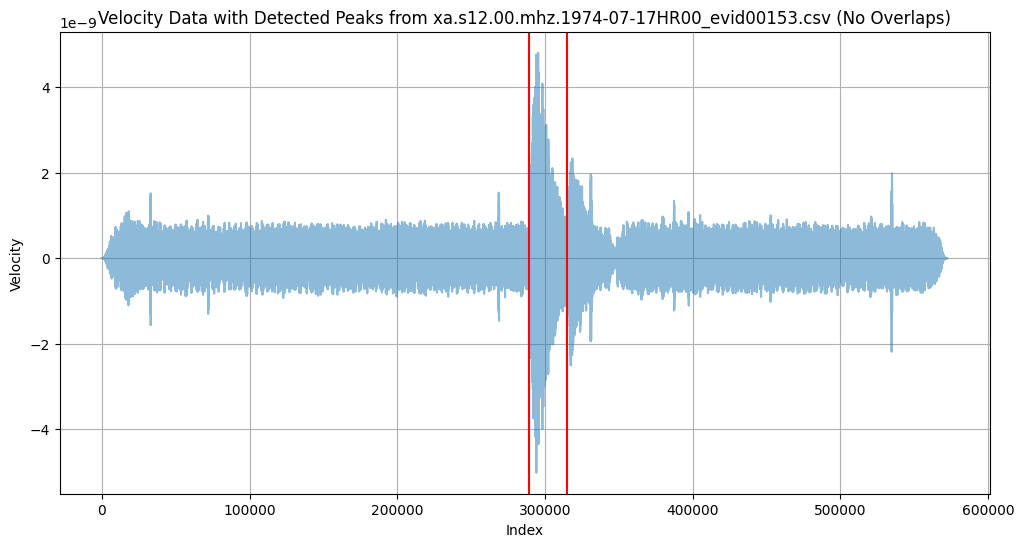

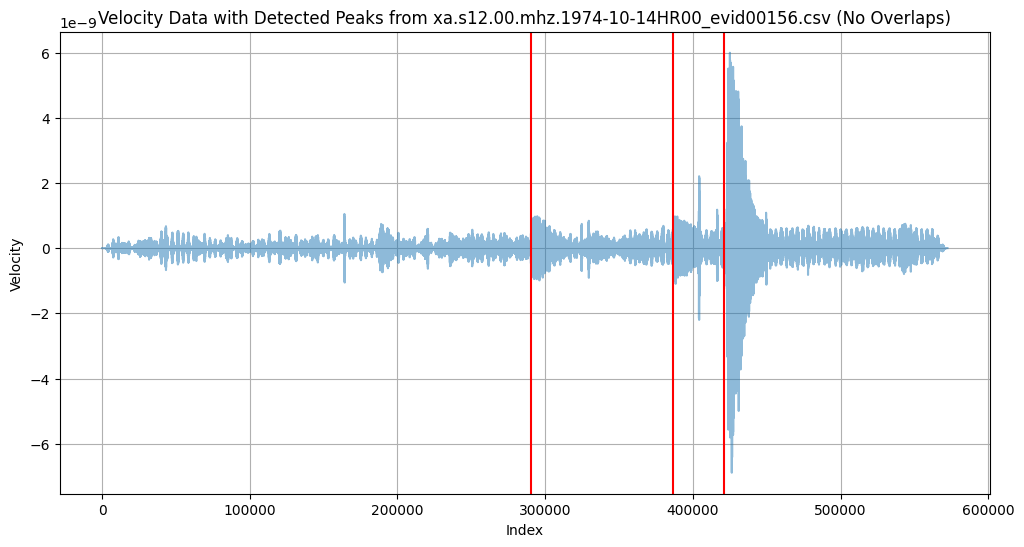

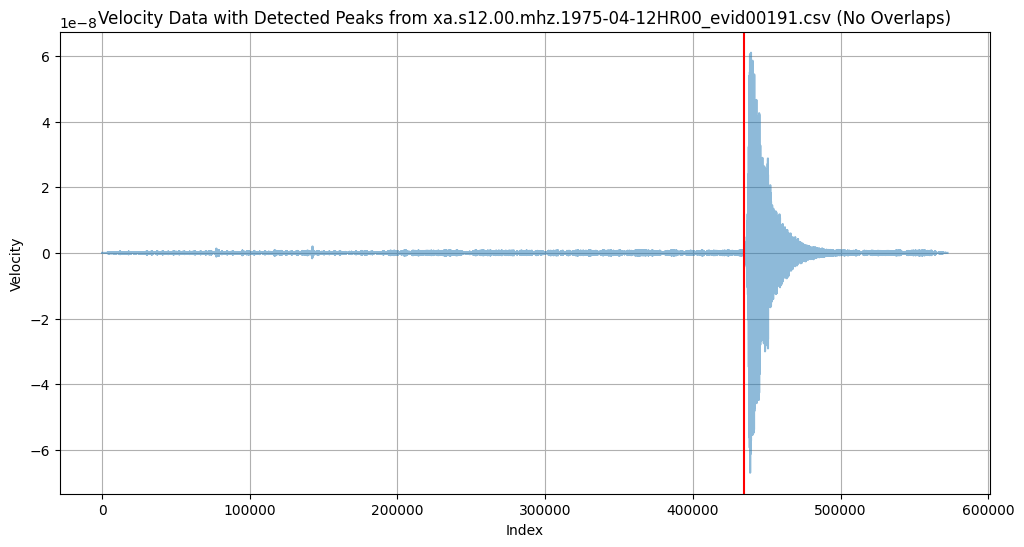

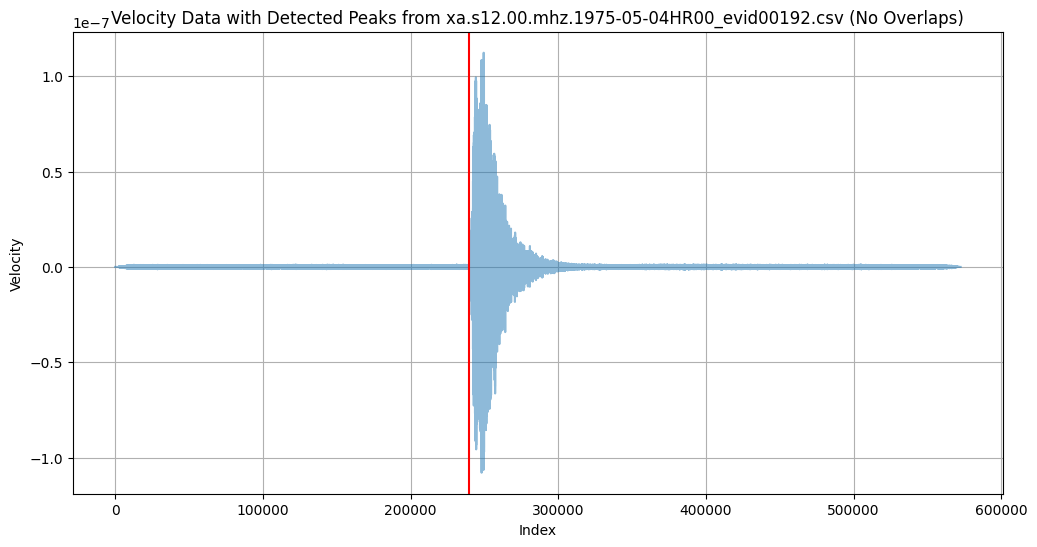

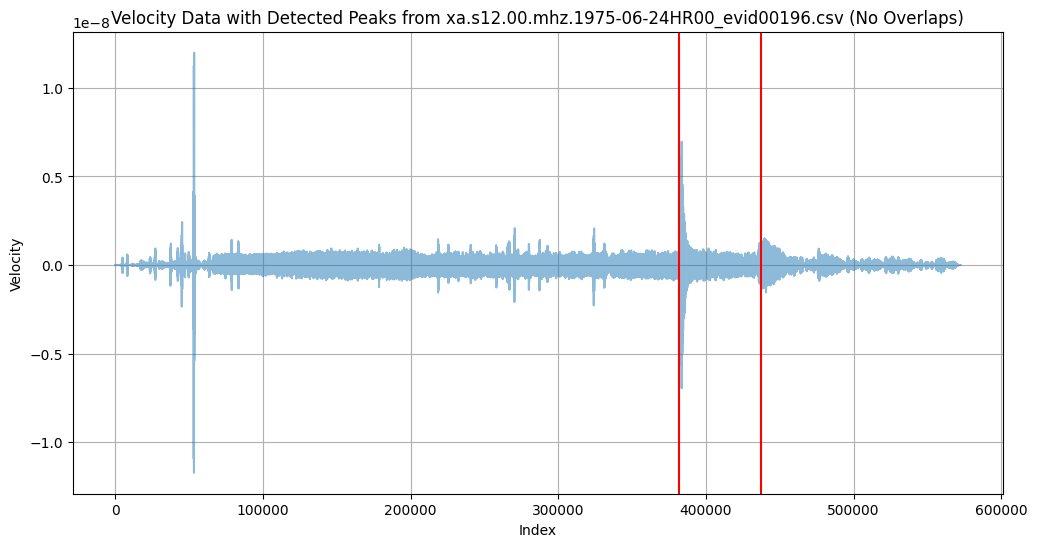

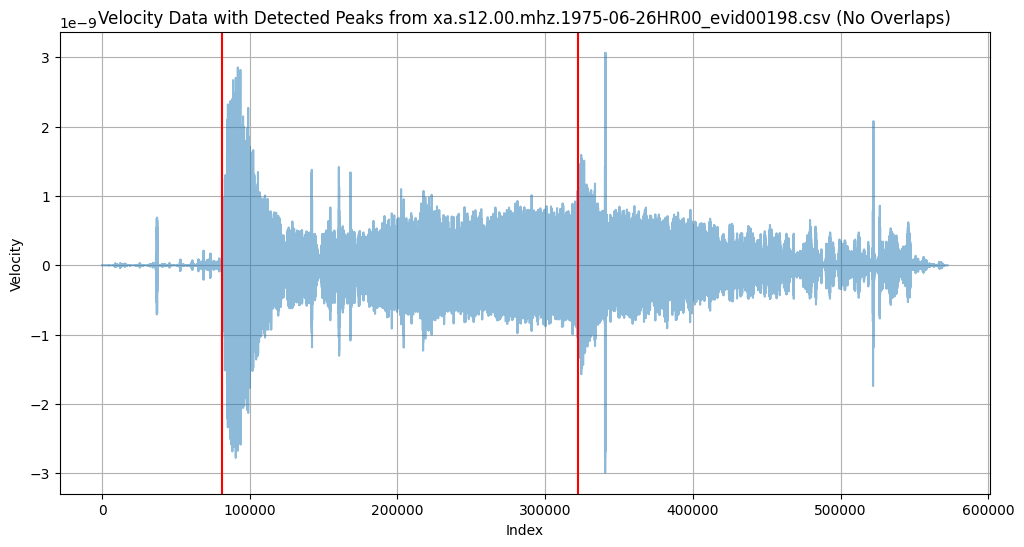

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_file(file_path):
    # Read the CSV file, specifying that the delimiter is a comma
    data = pd.read_csv(file_path, header=None,skiprows=1)  # No header in your format

    #Extract the third column (velocity) and convert it to a NumPy array
    velocity_array = data.iloc[:, 2].values  # Change to index 2 for velocity

    # Batch size 'a'
    a = 100  # Adjust this to your desired batch size

    # Initialize lists to hold max and min values for each batch
    max_values = []
    min_values = []
    max_indices = []
    min_indices = []

    # Loop through the data in batches of size 'a'
    for i in range(0, len(velocity_array), a):
        batch = velocity_array[i:i+a]
        
        if len(batch) > 0:  # Ensure batch has data
            # Find the maximum and minimum values in the current batch
            max_value = np.max(batch)
            min_value = np.min(batch)
            
            # Store the max and min values
            max_values.append(max_value)
            min_values.append(min_value)
            
            # Store the indices (relative to the batch) for plotting purposes
            max_indices.append(i + np.argmax(batch))  # Global index of the max value
            min_indices.append(i + np.argmin(batch))  # Global index of the min value

    # Convert the max and min values lists to NumPy arrays
    max_values_array = np.array(max_values)
    min_values_array = np.array(min_values)
    mean_of_max_values_array = max_values_array.mean()
    peak_indices = []

    batch_size = 10  # Number of data points to compare in each snippet
    amp = 2  # Threshold multiplier

    # Sliding window approach to check for peaks, skipping after finding a peak
    i = 0  # Initialize index for loop
    while i < len(max_values_array) - batch_size + 1:
        snippet = max_values_array[i:i+batch_size]
        
        # Check if all values in the snippet are greater than amp * mean_of_max_values_array
        if np.all(snippet > amp * mean_of_max_values_array):
            # Go back batch_size and store the index for plotting the green line
            peak_indices.append(i-15)
            # Skip to the next batch after this peak
            i += 1
        else:
            i += 1  # If no peak is found, move by 1

    # Filter peak_indices to remove consecutive indices
    filtered_peak_indices = []
    last_plotted_index = None

    for index in peak_indices:
        if last_plotted_index is None or index > last_plotted_index + 10*batch_size:  # Ensure no consecutive plotting
            filtered_peak_indices.append(index)
            last_plotted_index = index  # Update the last plotted index
        else:
            last_plotted_index = index

    # Plot the original velocity data
    plt.figure(figsize=(12, 6))  # Optional: Adjust the figure size
    plt.plot(velocity_array, label='Velocity Data', alpha=0.5)

    # Plot vertical green lines at the filtered peak indices
    for peak_index in filtered_peak_indices:
        plt.axvline(x=max_indices[peak_index], color='r', linestyle='-', label='Detected Peaks')

    plt.title(f'Velocity Data with Detected Peaks from {os.path.basename(file_path)} (No Overlaps)')
    plt.xlabel('Index')
    plt.ylabel('Velocity')
    plt.grid(True)
    plt.show()

# Loop through all CSV files in the specified folder
folder_path = r"C:\Users\SMate\Desktop\NASA_SPACEAPPS\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\data\lunar\training\data\S12_GradeA_CSV"
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        process_file(file_path)
